In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import math
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import scipy.stats  as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from scipy.stats import chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_excel("Healthcare_cat_dataset.xlsx")

In [3]:
#conda install -c conda-forge imbalanced-learn

In [4]:
df

,group,ID,outcome,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,cal_cat,chloride_cat,anion_cat,Mag_cat,ph_cat,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat
0,1,125047,0,72,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,1
1,1,139812,0,75,2,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,1
2,1,109787,0,83,2,1,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
3,1,130587,0,43,2,0,0,0,0,0,...,1,0,1,1,1,0,0,0,0,1
4,1,138290,0,75,2,0,1,0,0,0,...,1,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0,62,1,1,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1173,2,101659,0,78,1,1,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
1174,2,162069,0,85,2,1,1,1,0,1,...,0,1,1,1,0,1,0,1,0,1
1175,2,120967,0,79,2,0,0,0,1,1,...,0,1,1,1,0,1,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   group               1177 non-null   int64  
 1   ID                  1177 non-null   int64  
 2   outcome             1177 non-null   int64  
 3   age                 1177 non-null   int64  
 4   gendera             1177 non-null   int64  
 5   BMI_cat             1177 non-null   int64  
 6   hypertensive        1177 non-null   int64  
 7   atrialfibrillation  1177 non-null   int64  
 8   CHD with no MI      1177 non-null   int64  
 9   diabetes            1177 non-null   int64  
 10  deficiencyanemias   1177 non-null   int64  
 11  depression          1177 non-null   int64  
 12  Hyperlipemia        1177 non-null   int64  
 13  Renal failure       1177 non-null   int64  
 14  COPD                1177 non-null   int64  
 15  heart rate at       1177 non-null   int64  
 16  Pulse 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
group,1177.0,1.299065,0.458043,1.0,1.0,1.0,2.0,2.0
ID,1177.0,150778.120646,29034.669513,100213.0,125603.0,151901.0,176048.0,199952.0
outcome,1177.0,0.135089,0.341964,0.0,0.0,0.0,0.0,1.0
age,1177.0,74.055225,13.434061,19.0,65.0,77.0,85.0,99.0
gendera,1177.0,1.525064,0.499584,1.0,1.0,2.0,2.0,2.0
BMI_cat,1177.0,0.445200,0.497199,0.0,0.0,0.0,1.0,1.0
hypertensive,1177.0,0.717927,0.450200,0.0,0.0,1.0,1.0,1.0
atrialfibrillation,1177.0,0.451147,0.497819,0.0,0.0,0.0,1.0,1.0
CHD with no MI,1177.0,0.085811,0.280204,0.0,0.0,0.0,0.0,1.0
diabetes,1177.0,0.421410,0.493995,0.0,0.0,0.0,1.0,1.0


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

group                  0
ID                     0
outcome                0
age                    0
gendera                0
BMI_cat                0
hypertensive           0
atrialfibrillation     0
CHD with no MI         0
diabetes               0
deficiencyanemias      0
depression             0
Hyperlipemia           0
Renal failure          0
COPD                   0
heart rate at          0
Pulse rate cat        16
Sys_cat                0
Diastolic              0
respiratory cat        0
temp_cat               0
SPO2                   0
urine_cat              0
hemocrit_cat           0
RBC_Cat                0
mch_cat                0
mchc_Cat               0
mcv_cta                0
rdw_cat                0
leukocytes_cat         0
platelets_cat          0
neutriphil_cat         0
Basophil_cat           0
Lympho_cat             0
PT_cat(sec)            0
INR_cat                0
NT_cat                 0
CK_cat                 0
Creatinine_cat         0
UN_cat                 0


In [9]:
df['Pulse rate cat'] = df['Pulse rate cat'].fillna(1)

In [10]:
df['Pulse rate cat'].isnull().sum()

0

In [11]:
df['Pulse rate cat'].mode()

0    1.0
Name: Pulse rate cat, dtype: float64

In [12]:
independent_variable = df.drop(columns = ['group', 'ID', 'outcome', 'age'],axis = 1)
dependent_variable = df["outcome"]

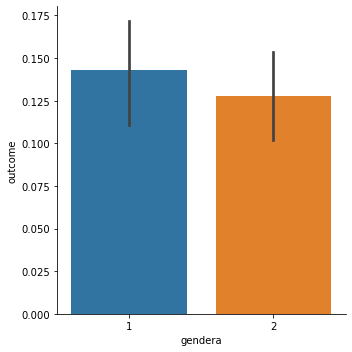

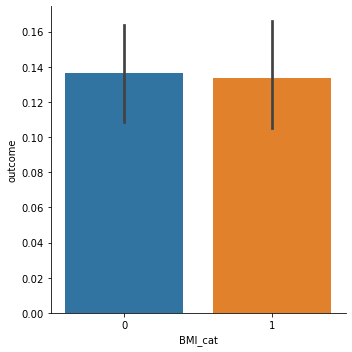

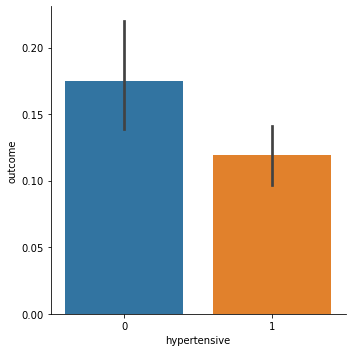

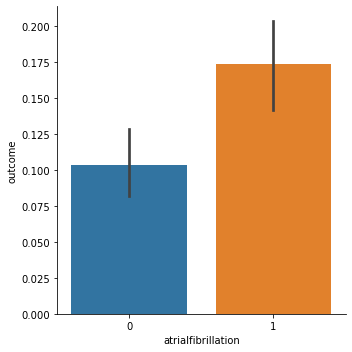

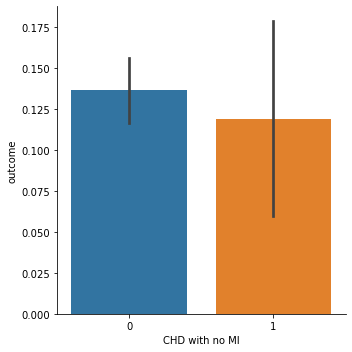

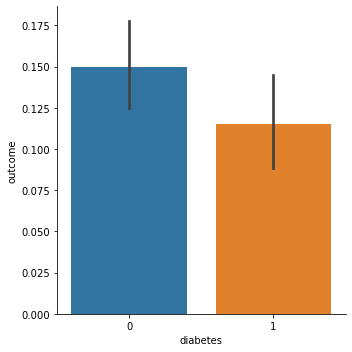

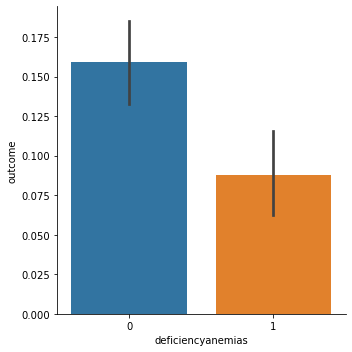

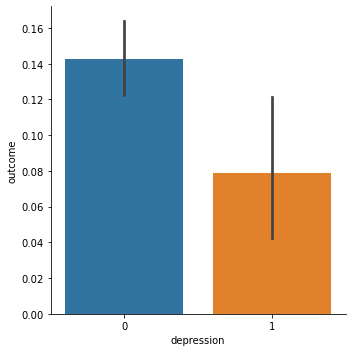

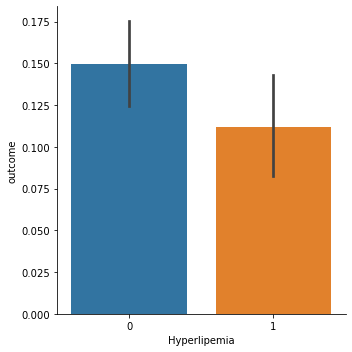

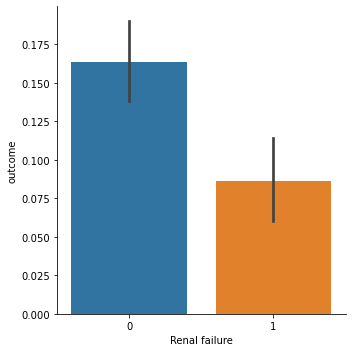

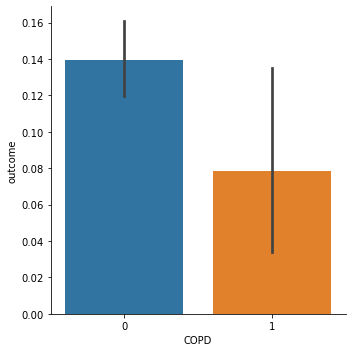

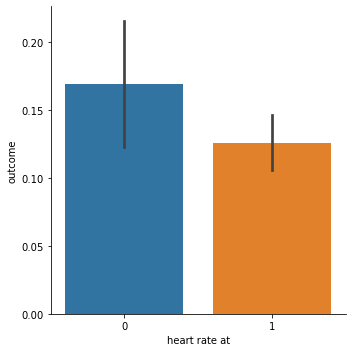

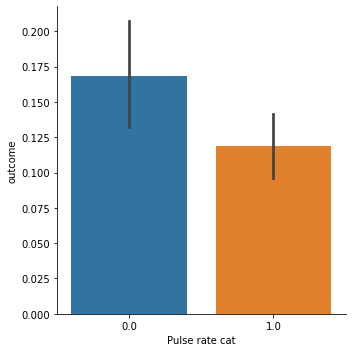

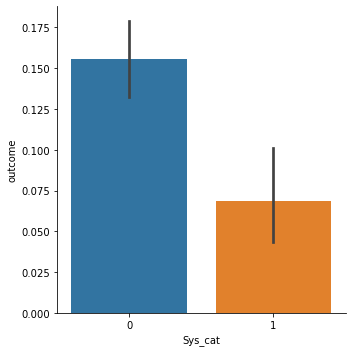

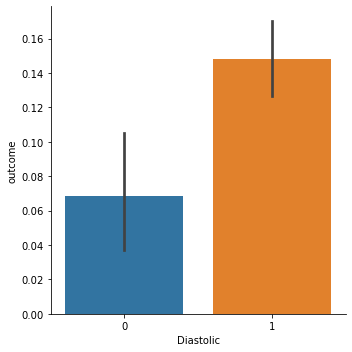

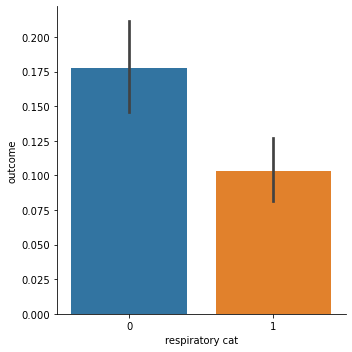

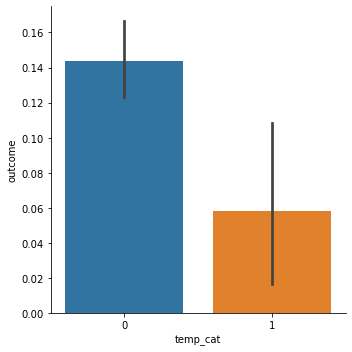

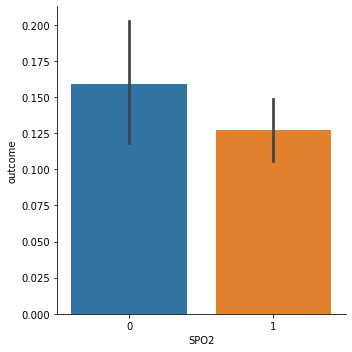

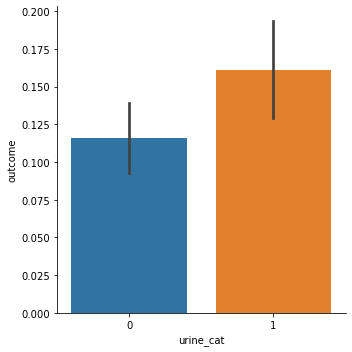

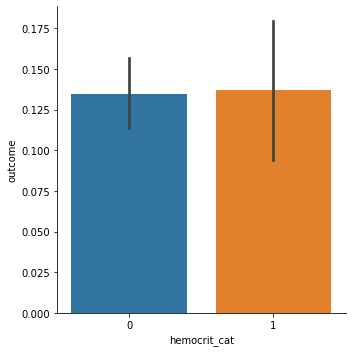

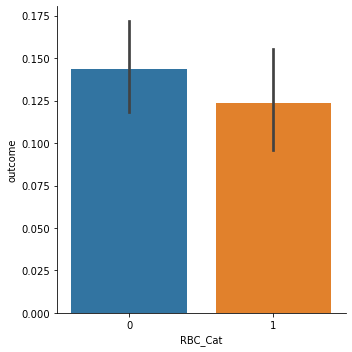

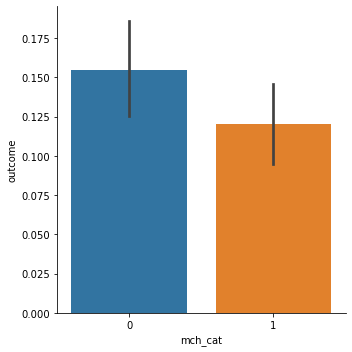

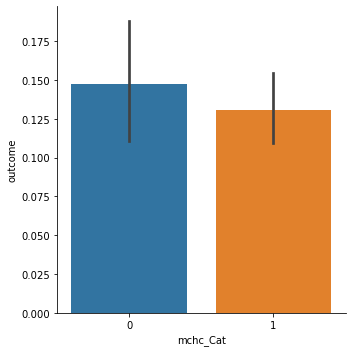

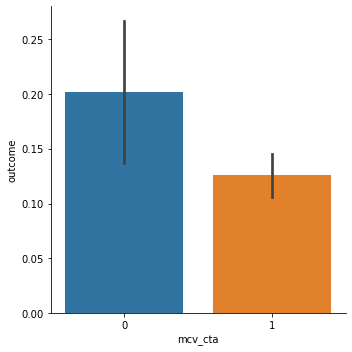

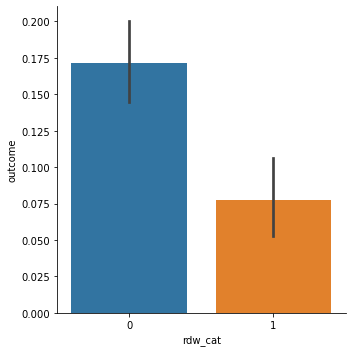

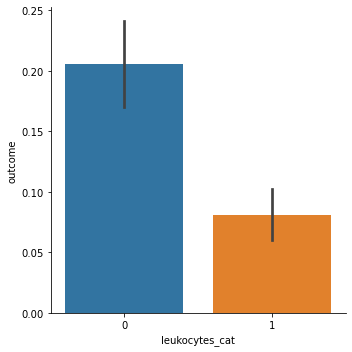

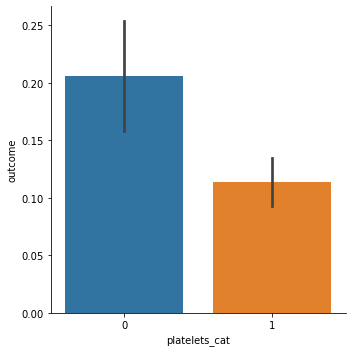

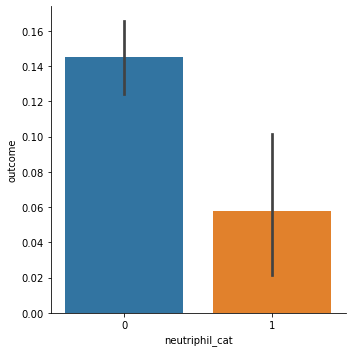

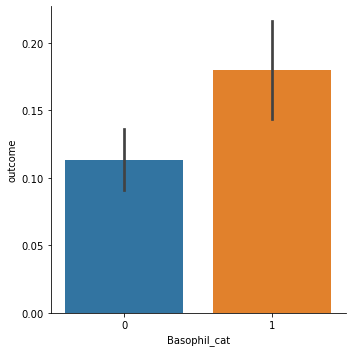

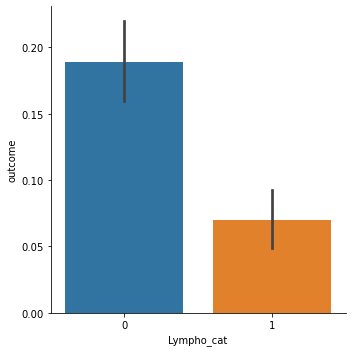

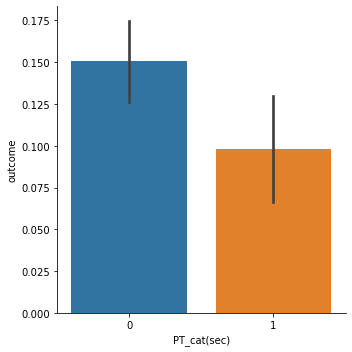

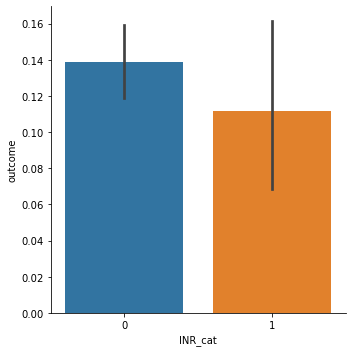

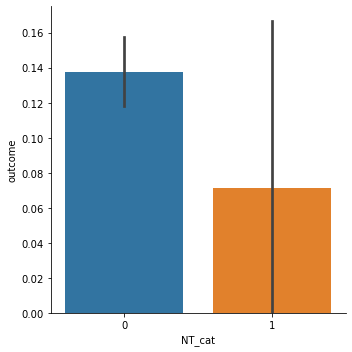

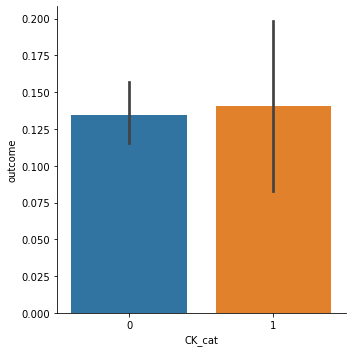

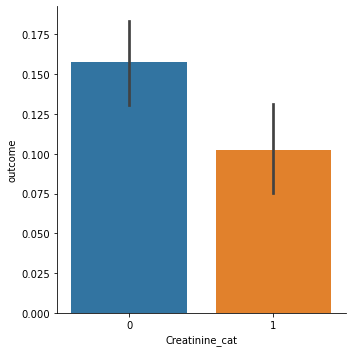

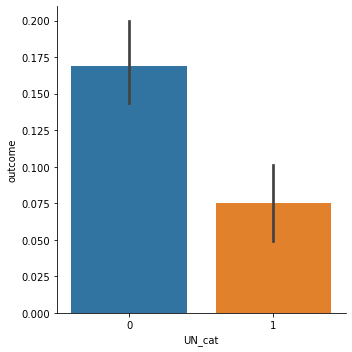

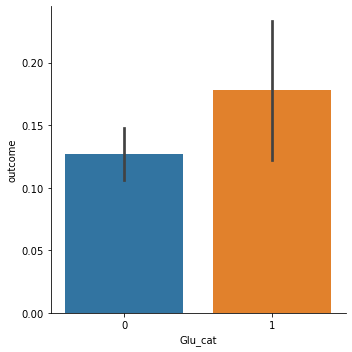

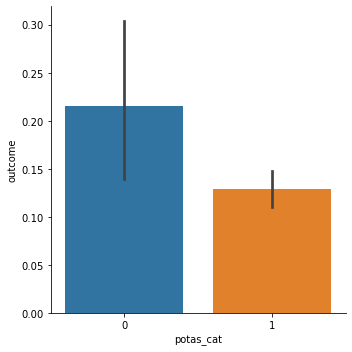

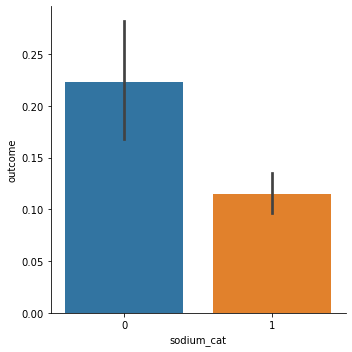

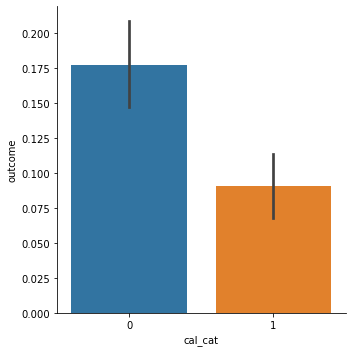

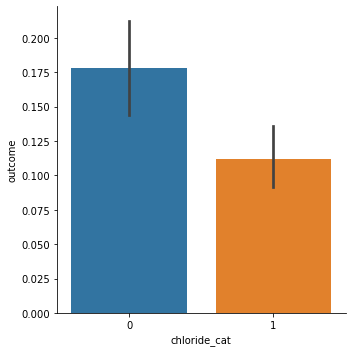

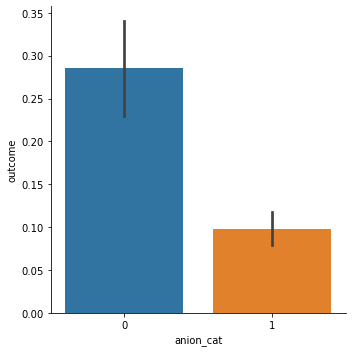

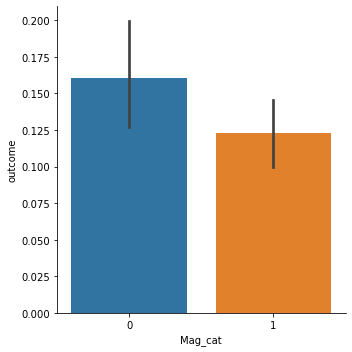

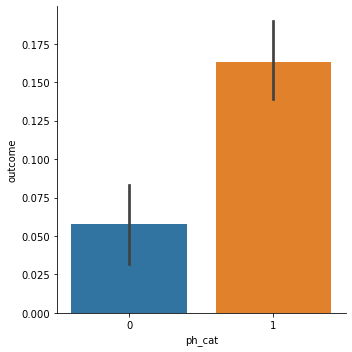

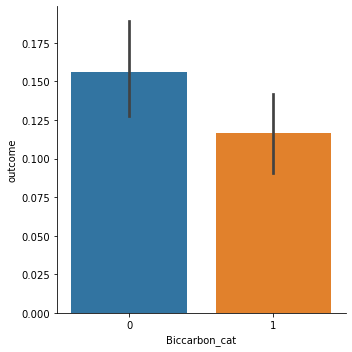

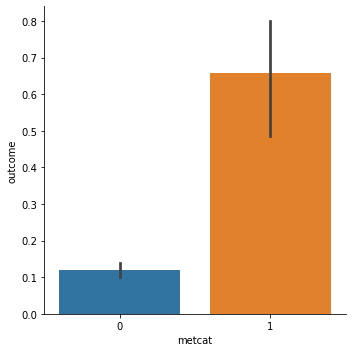

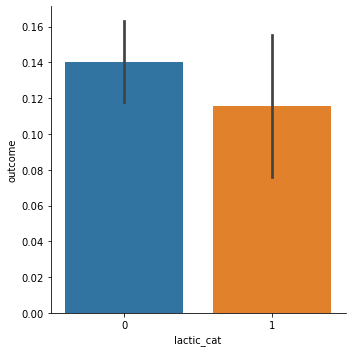

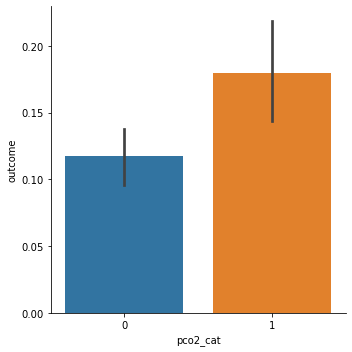

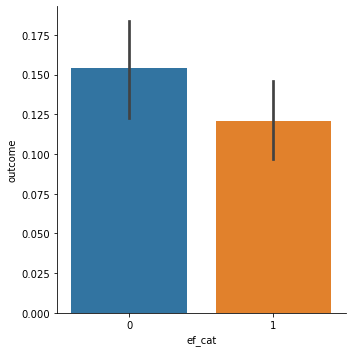

In [13]:
for col in independent_variable:
    sns.catplot(data = df,y = "outcome", x = col ,kind = "bar" )
    plt.show()

### with the help of cat plot we can assume that:
a) gender,BMI,CHD WITH NO MI,Hemocrit cat,RBC CAT,MCHC CAT,SPO2,INR CAT,CK_CAT,LACTIC CAT,heart rate does not impact on outcome very much.Because in normal and abnormal condition outcomes are nearly same.

    

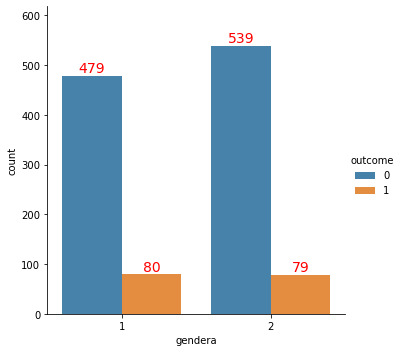

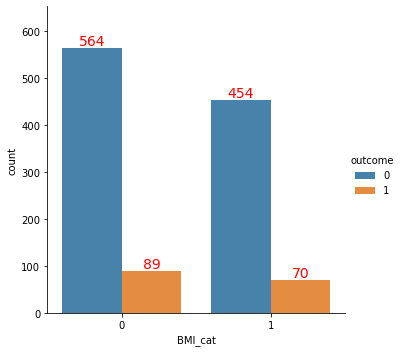

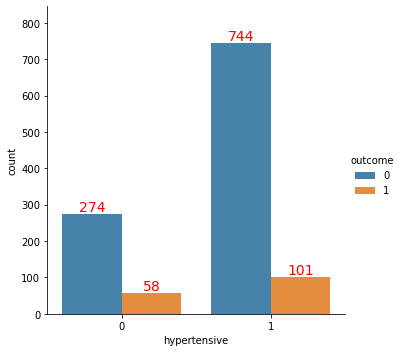

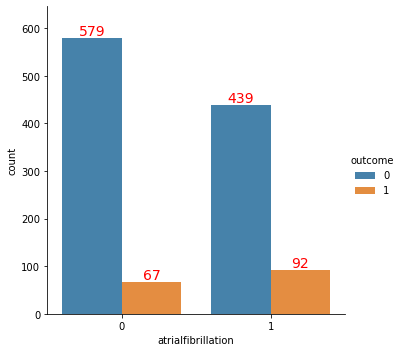

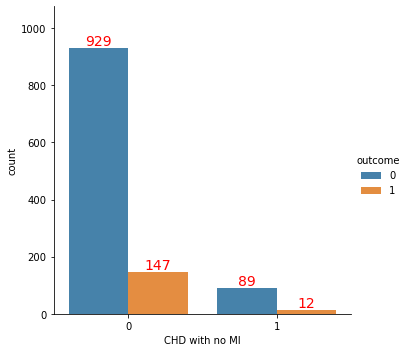

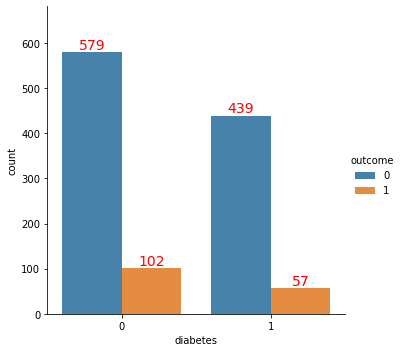

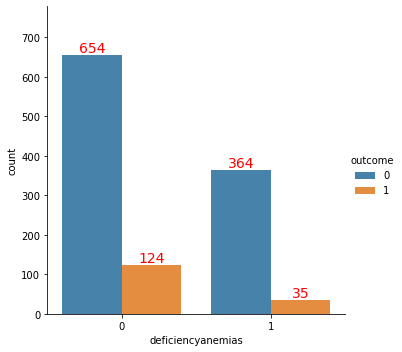

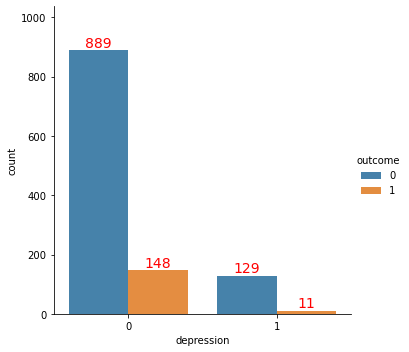

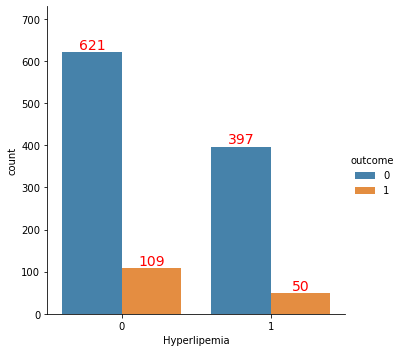

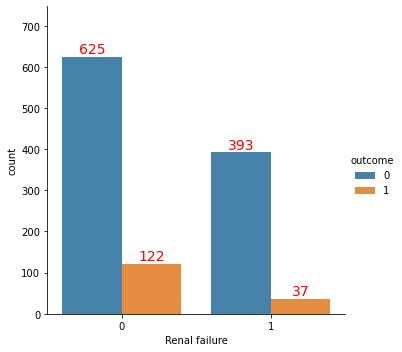

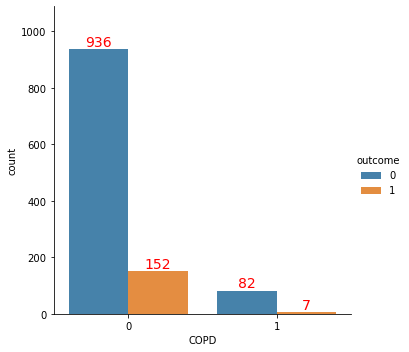

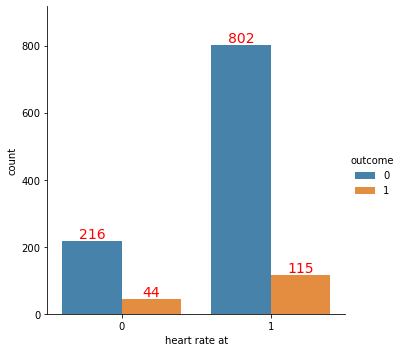

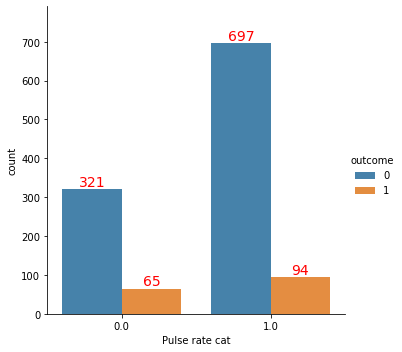

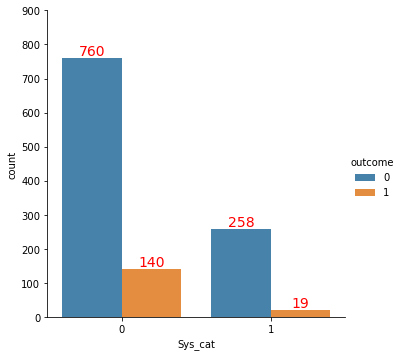

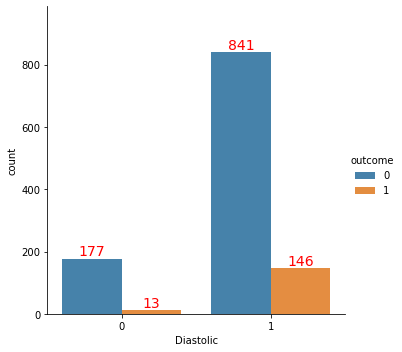

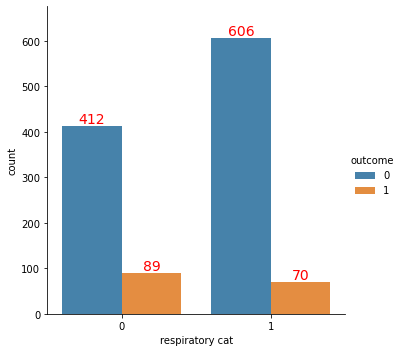

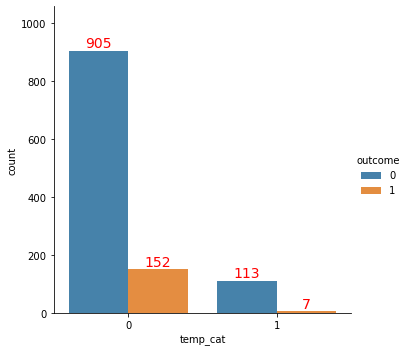

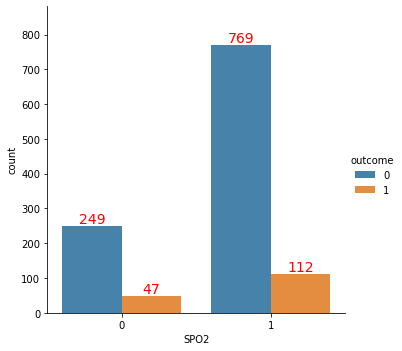

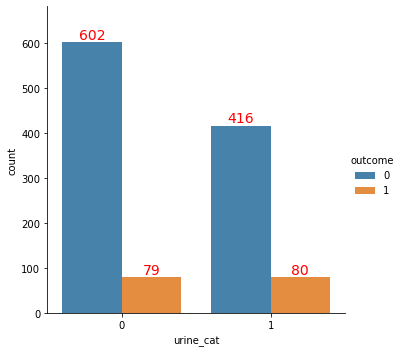

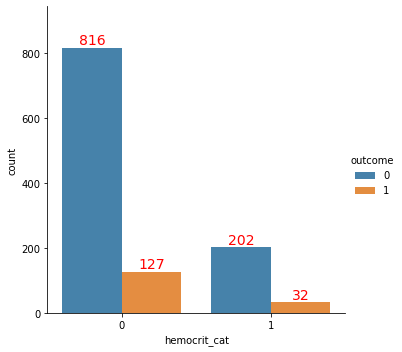

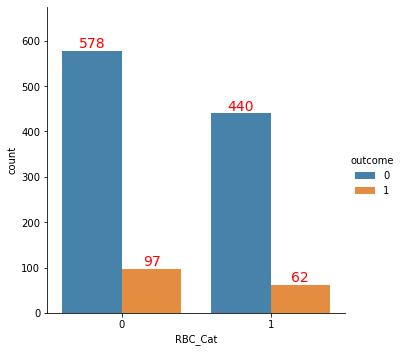

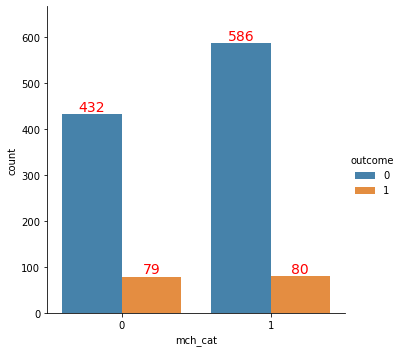

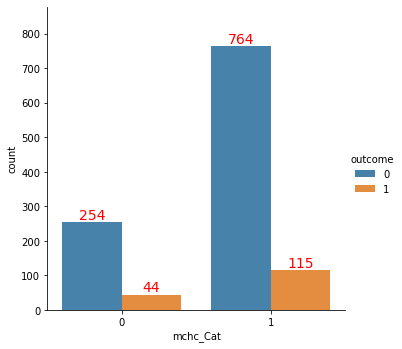

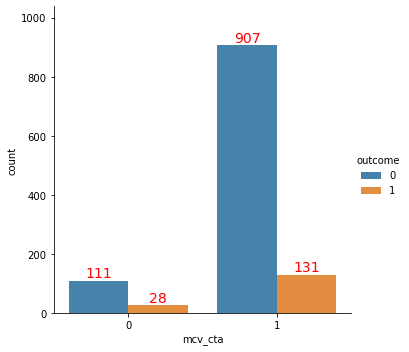

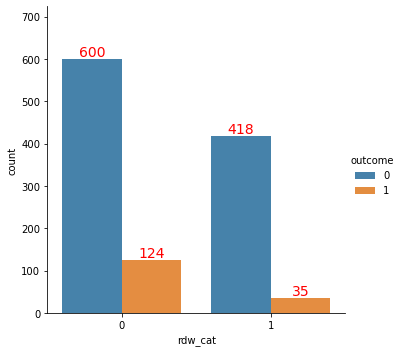

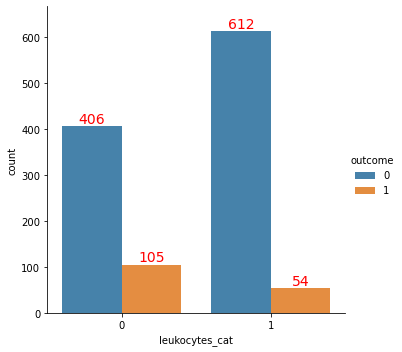

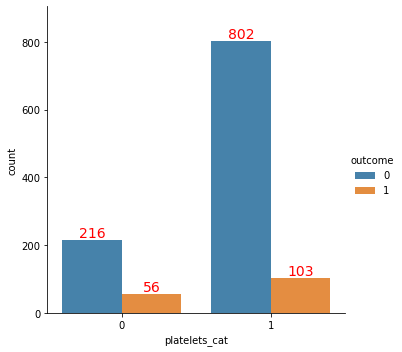

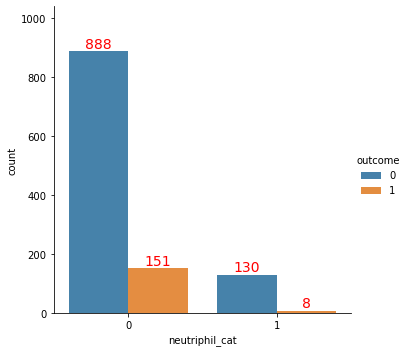

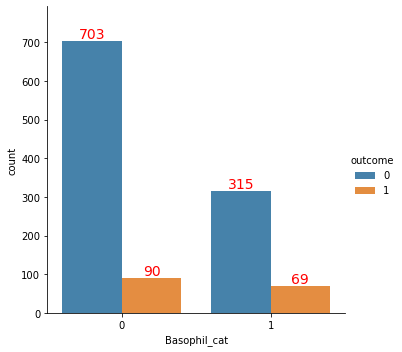

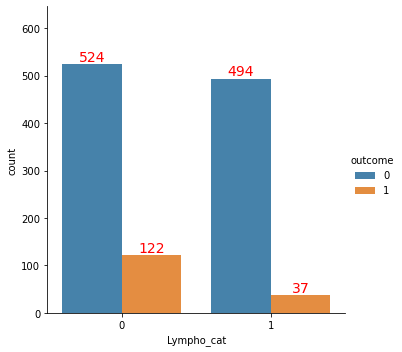

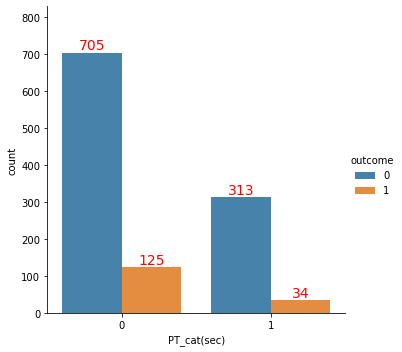

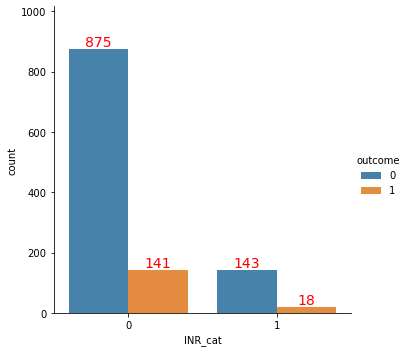

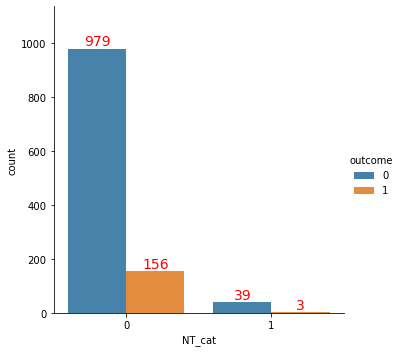

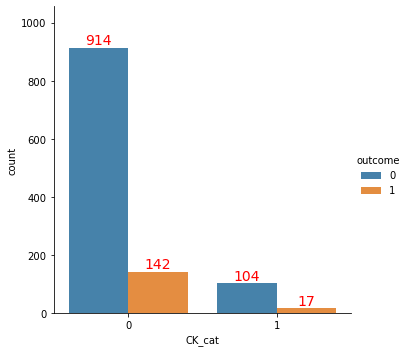

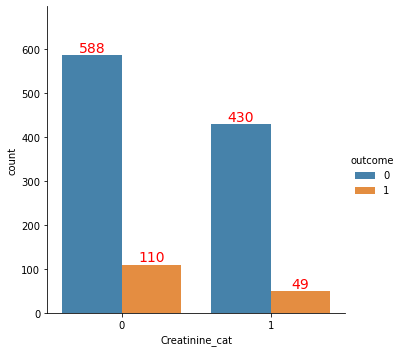

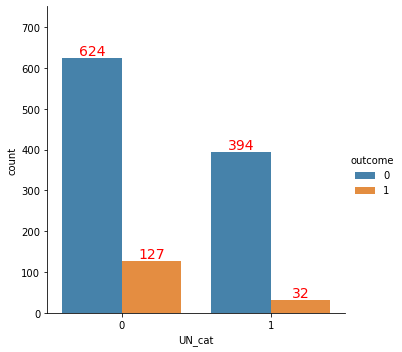

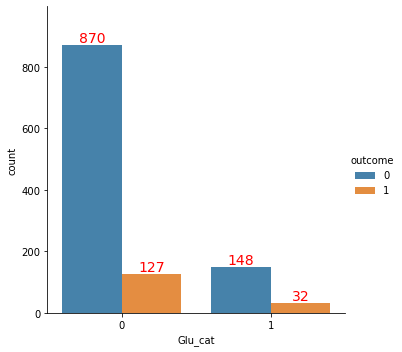

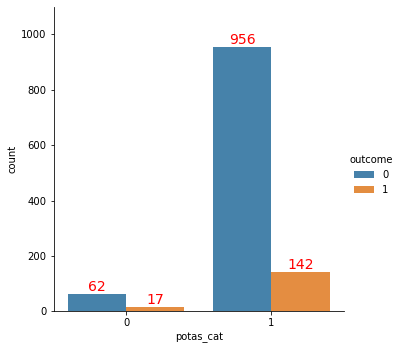

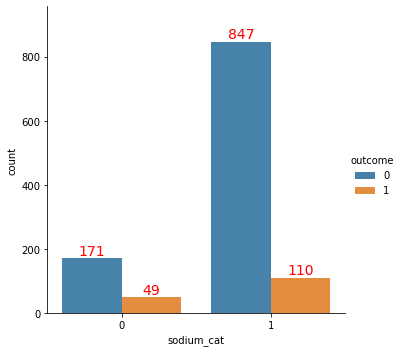

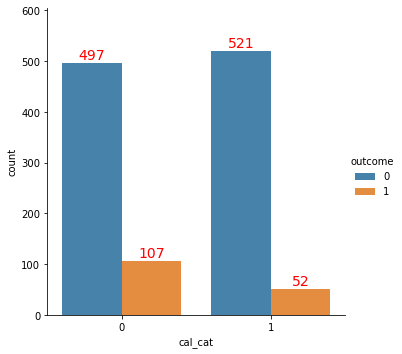

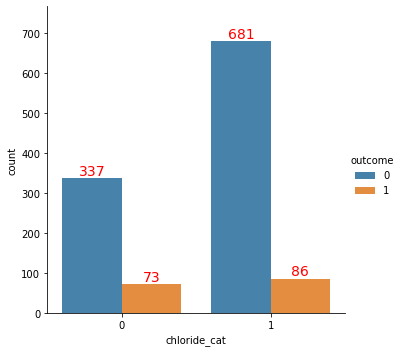

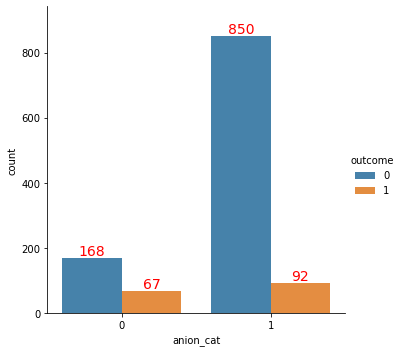

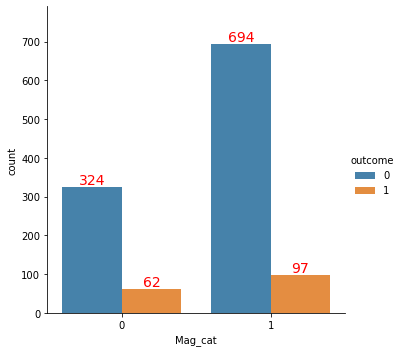

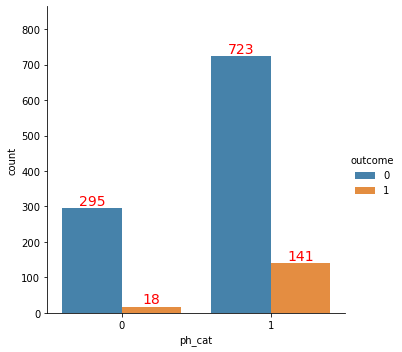

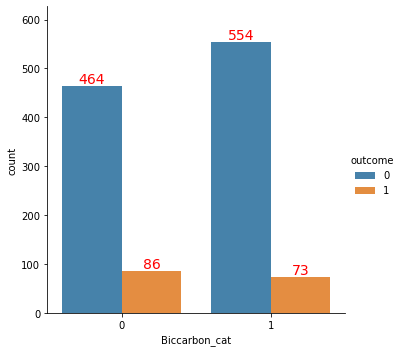

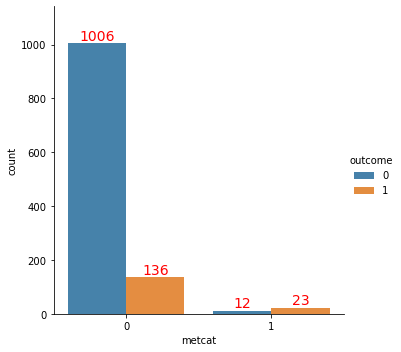

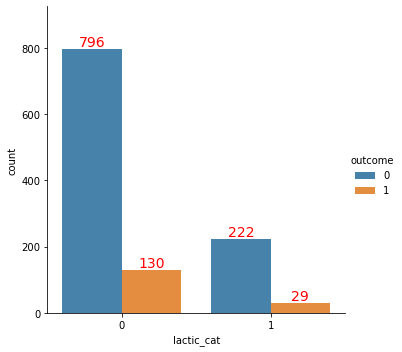

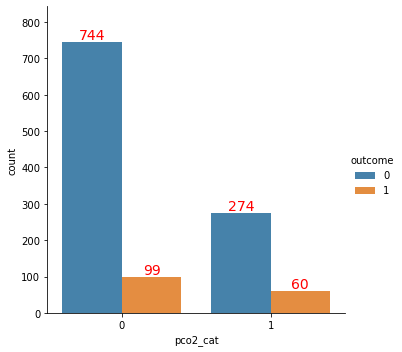

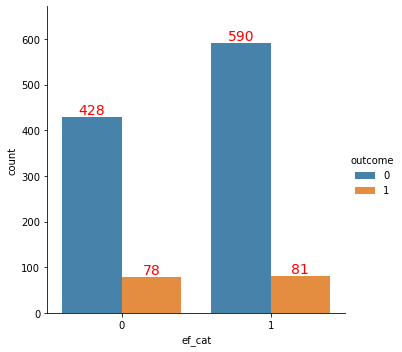

In [14]:
import math

for col in independent_variable:  
    sns.factorplot(x = col,hue = "outcome", data=df, kind='count', alpha=0.9, size=5, aspect=1)
    ax = plt.gca()
    y_max = df[col].value_counts().max() 
    ax.set_ylim([0, round(y_max)])
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=14, color='red', ha='center', va='bottom')
    

### count plot analysis:
1.) we can see in count plot % outcome of gender are same.it means in  MALE  and FEMALE outcome % are same they are not impacting outcome very much.
2.) we can see ### BMI_CAT,CHD WITH NO MI,DIABETES,heart rate,SPO2,HEMOCRIT_CAT,RBC_CAT,MCHC CAT,INR_CAT,ck_cat,ef_cat outcome % are same.means in normal and in abnormal condition they can impact same.


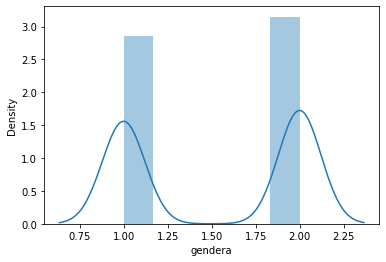

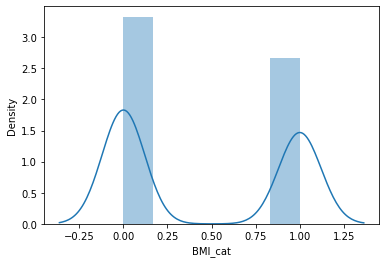

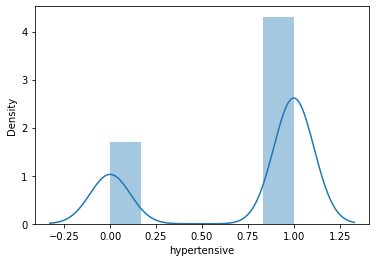

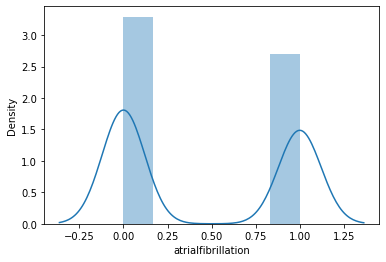

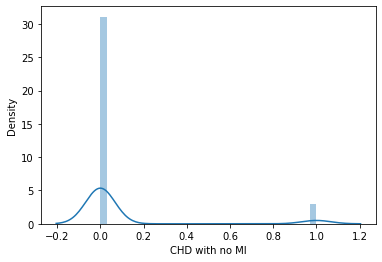

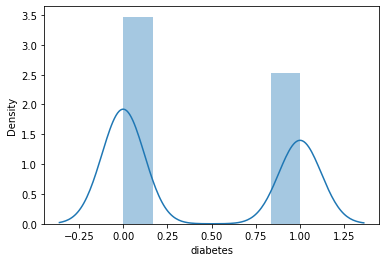

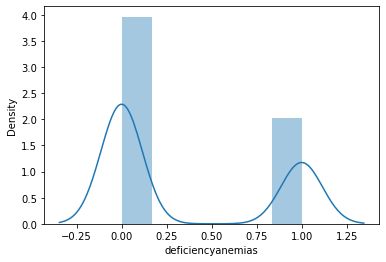

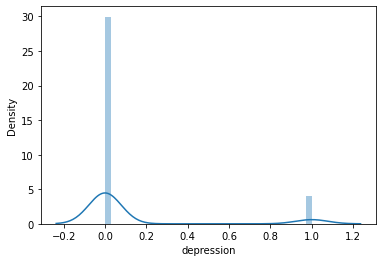

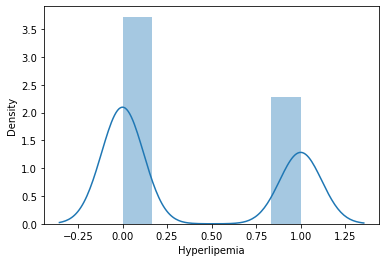

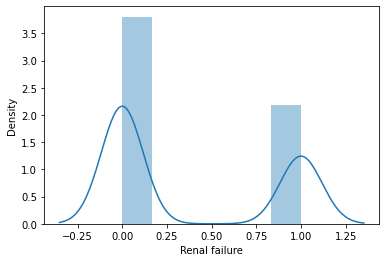

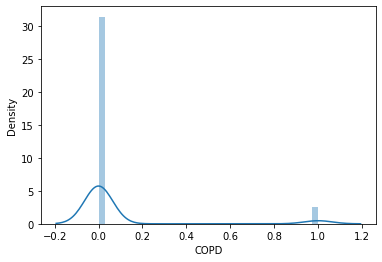

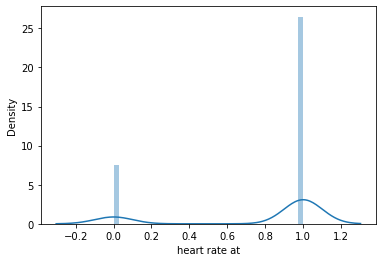

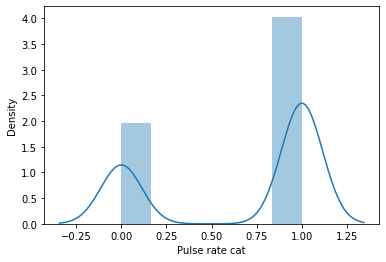

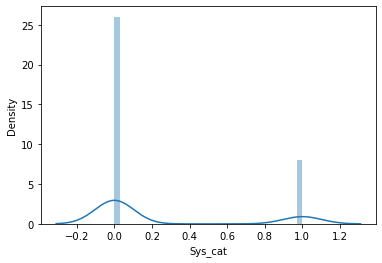

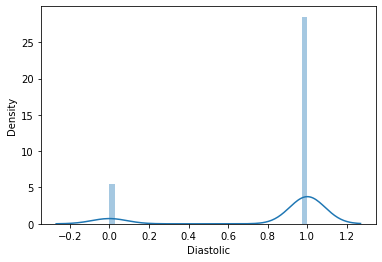

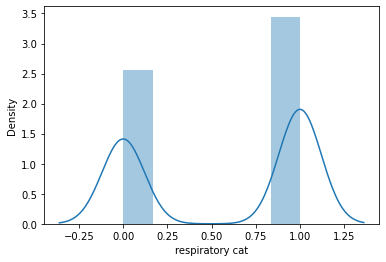

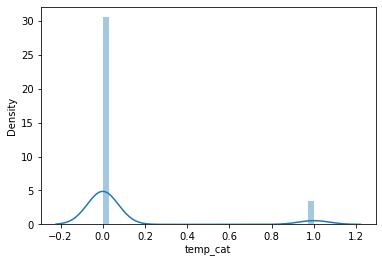

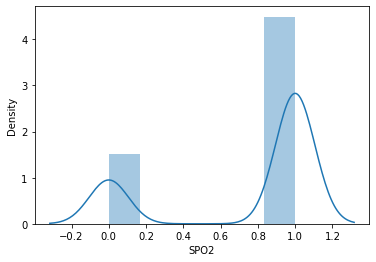

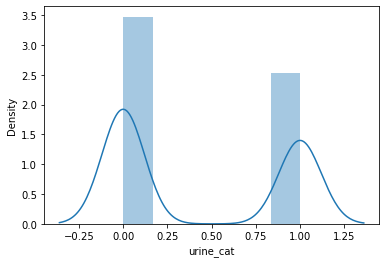

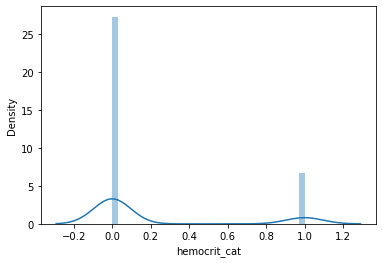

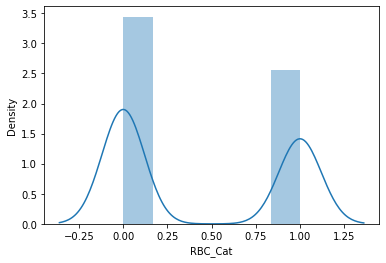

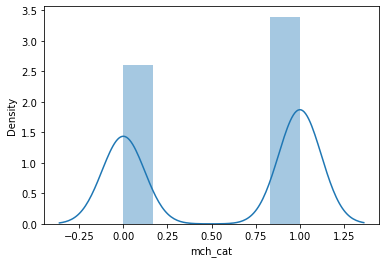

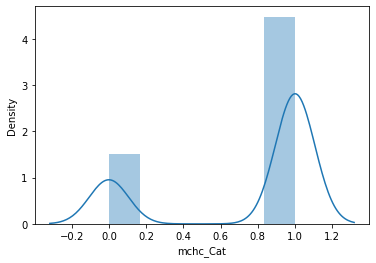

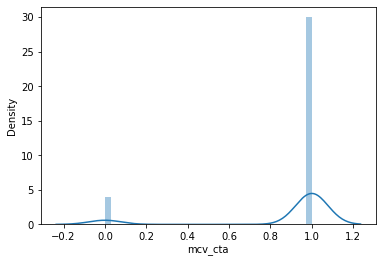

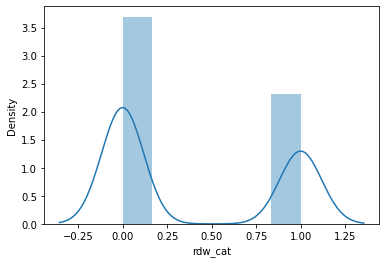

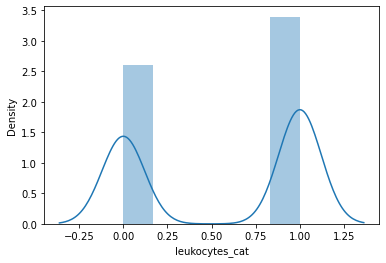

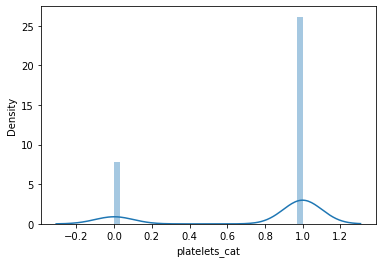

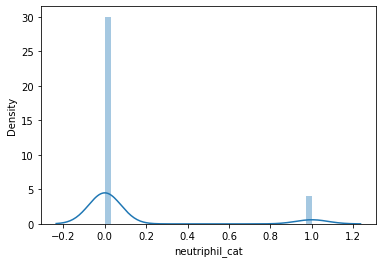

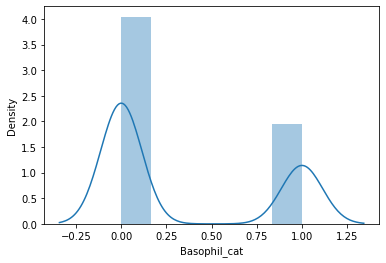

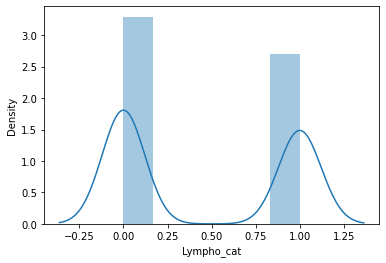

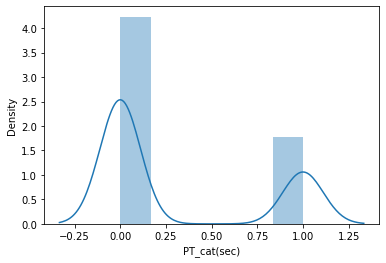

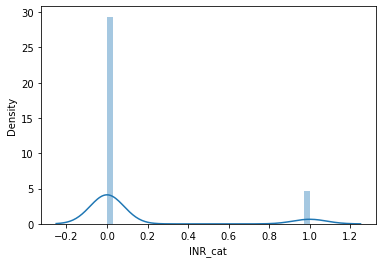

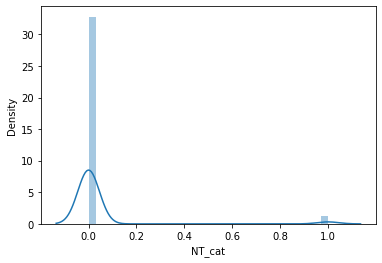

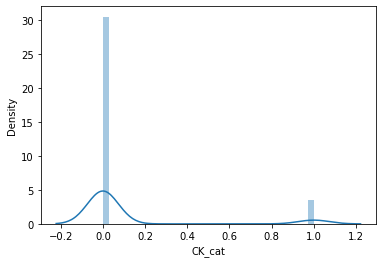

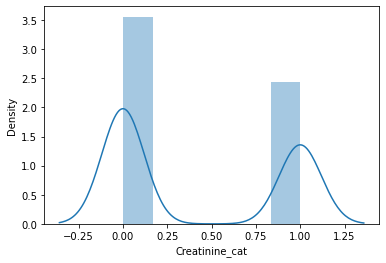

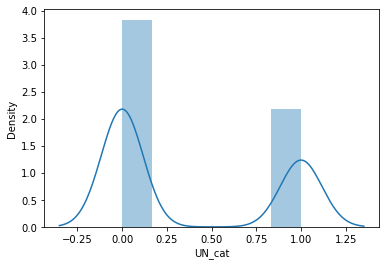

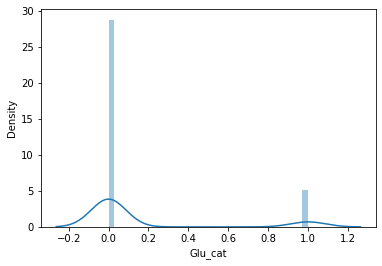

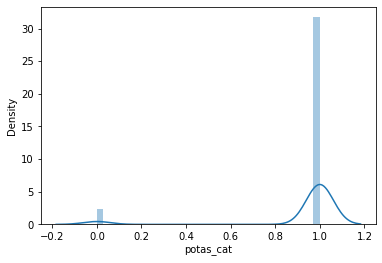

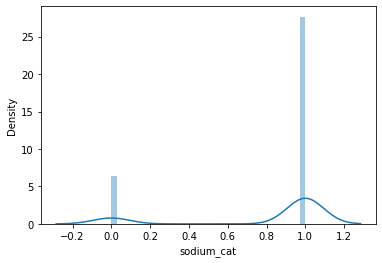

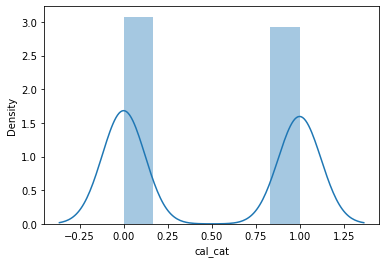

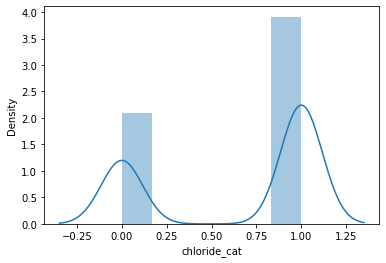

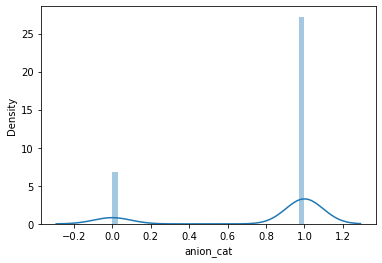

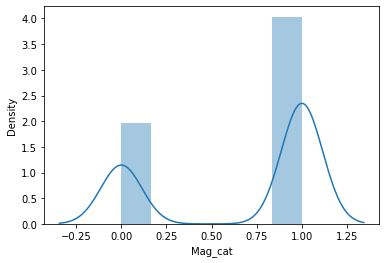

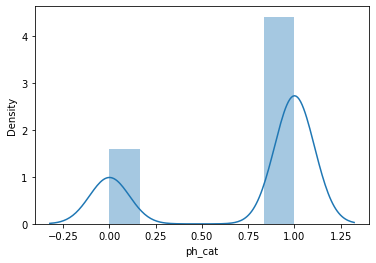

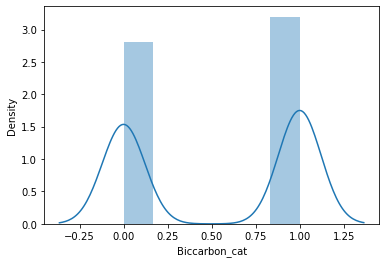

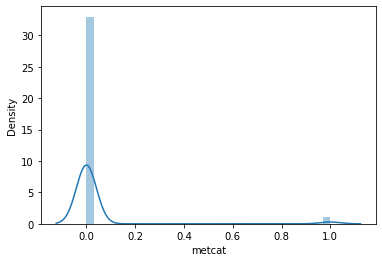

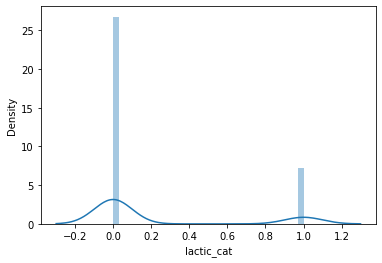

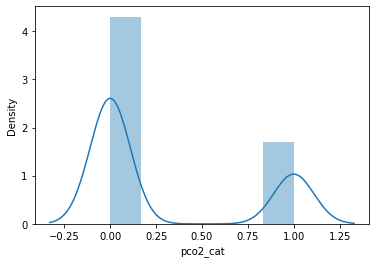

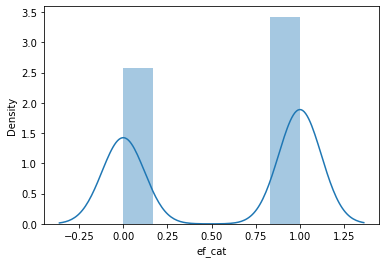

In [15]:
for col in independent_variable:   #here we can see our all independent data is normally distributed
    sns.distplot(df[col])
    plt.show()

In [16]:
# for finding out the p_value between one categorical variable and continous variable
stats.pointbiserialr(df['outcome'],df['age'])

PointbiserialrResult(correlation=0.06427003628872001, pvalue=0.02746272967875483)

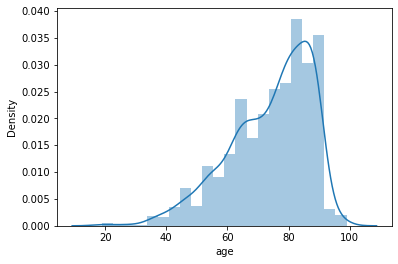

In [17]:
sns.distplot(df["age"])     #herre we can see age is not normaly distributed.
plt.show()

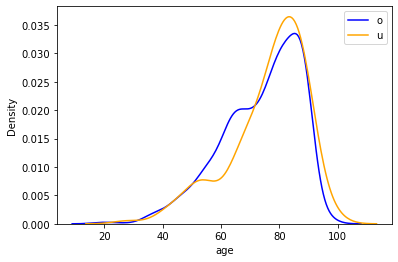

In [18]:
sns.distplot(df[df['outcome'] == 0]['age'], hist=False, color="blue")          # 0 - survive ,1 - not survive
sns.distplot(df[df['outcome'] == 1]['age'], hist=False, color="orange")
plt.legend("outcome")
plt.show()

In [19]:
### by the distribution plot we can see the survival rate and not survival rate are same.

### feature engineering

In [20]:
df

,group,ID,outcome,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,cal_cat,chloride_cat,anion_cat,Mag_cat,ph_cat,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat
0,1,125047,0,72,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,1
1,1,139812,0,75,2,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,1
2,1,109787,0,83,2,1,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
3,1,130587,0,43,2,0,0,0,0,0,...,1,0,1,1,1,0,0,0,0,1
4,1,138290,0,75,2,0,1,0,0,0,...,1,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0,62,1,1,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1173,2,101659,0,78,1,1,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
1174,2,162069,0,85,2,1,1,1,0,1,...,0,1,1,1,0,1,0,1,0,1
1175,2,120967,0,79,2,0,0,0,1,1,...,0,1,1,1,0,1,0,1,0,0


In [21]:
new_feature = []
for y in range(len(df["deficiencyanemias"])):
    if df["deficiencyanemias"][y] == 0 and df["RBC_Cat"][y] == 0:
        new_feature.append(0)
    if df["deficiencyanemias"][y] == 0 and df["RBC_Cat"][y] == 1:
        new_feature.append(1)
    if df["deficiencyanemias"][y] == 1 and df["RBC_Cat"][y] == 0:
        new_feature.append(0)
    if df["deficiencyanemias"][y] == 1 and df["RBC_Cat"][y] == 1:
        new_feature.append(1)
anemia_rbc_cat = pd.Series(new_feature)
anemia_rbc_cat
df["anemia_rbc_cat"] = pd.DataFrame(anemia_rbc_cat)
df["anemia_rbc_cat"]

0       0
1       0
2       0
3       1
4       0
       ..
1172    1
1173    0
1174    0
1175    0
1176    0
Name: anemia_rbc_cat, Length: 1177, dtype: int64

In [22]:
new_feature = []
for y in range(len(df['PT_cat(sec)'])):
    if df['PT_cat(sec)'][y] == 0 and df['INR_cat'][y] == 1:
        new_feature.append(0)
    if df['PT_cat(sec)'][y] == 0 and df['INR_cat'][y] == 0:
        new_feature.append(0)
    if df['PT_cat(sec)'][y] == 1 and df['INR_cat'][y] == 0:
        new_feature.append(1)
    if df['PT_cat(sec)'][y] == 1 and df['INR_cat'][y] == 1:
        new_feature.append(1)
pt_inr_cat = pd.Series(new_feature)
df["pt_inr_cat"] = pd.DataFrame(pt_inr_cat)
df["pt_inr_cat"]

0       0
1       0
2       1
3       0
4       0
       ..
1172    1
1173    0
1174    1
1175    0
1176    0
Name: pt_inr_cat, Length: 1177, dtype: int64

In [23]:
def PerformHypothesisTest(dependentVariable):
        evalResult = pd.DataFrame(columns = ['Feature','p_Value'])
        for col in independent_variable:
            df_table = pd.crosstab(df['outcome'],df[col])
            val = stats.chi2_contingency(df_table)
            evalResult = evalResult.append({'Feature' : col,
                                            'p_Value' : val[1],
                                           'chi_square': val[0]},ignore_index = True)
        return evalResult

In [24]:
hypothesis_result = PerformHypothesisTest(dependent_variable)
hypothesis_result

,Feature,p_Value,chi_square
0,gendera,0.496181,0.463094
1,BMI_cat,0.96076,0.002421
2,hypertensive,0.016522,5.746415
3,atrialfibrillation,0.000705,11.475368
4,CHD with no MI,0.727614,0.121314
5,diabetes,0.100729,2.693961
6,deficiencyanemias,0.000917,10.987420
7,depression,0.050873,3.812465
8,Hyperlipemia,0.082424,3.016453
9,Renal failure,0.000266,13.293488


### balancing the imbalance data set

In [25]:
# distribution in target variable
df["outcome"].value_counts(normalize = True)

0    0.864911
1    0.135089
Name: outcome, dtype: float64

In [26]:
## checking imbalance data for all independent variables
for col in independent_variable:
    z= df[col].value_counts()
    print("variable name:-",col)
    print(z)
    print(" ")

variable name:- gendera
2    618
1    559
Name: gendera, dtype: int64
 
variable name:- BMI_cat
0    653
1    524
Name: BMI_cat, dtype: int64
 
variable name:- hypertensive
1    845
0    332
Name: hypertensive, dtype: int64
 
variable name:- atrialfibrillation
0    646
1    531
Name: atrialfibrillation, dtype: int64
 
variable name:- CHD with no MI
0    1076
1     101
Name: CHD with no MI, dtype: int64
 
variable name:- diabetes
0    681
1    496
Name: diabetes, dtype: int64
 
variable name:- deficiencyanemias
0    778
1    399
Name: deficiencyanemias, dtype: int64
 
variable name:- depression
0    1037
1     140
Name: depression, dtype: int64
 
variable name:- Hyperlipemia
0    730
1    447
Name: Hyperlipemia, dtype: int64
 
variable name:- Renal failure
0    747
1    430
Name: Renal failure, dtype: int64
 
variable name:- COPD
0    1088
1      89
Name: COPD, dtype: int64
 
variable name:- heart rate at
1    917
0    260
Name: heart rate at, dtype: int64
 
variable name:- Pulse rate c

<AxesSubplot:>

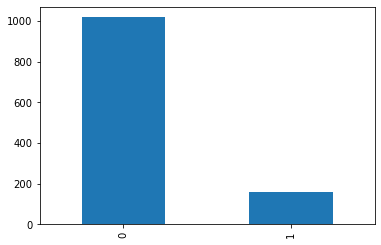

In [27]:
df["outcome"].value_counts().plot(kind = 'bar')

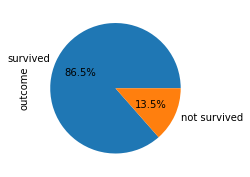

In [28]:
plt.figure(figsize = (5,3))
df["outcome"].value_counts().plot(kind = 'pie',autopct = "%1.1f%%",labels = ["survived","not survived"])
plt.show()


In [29]:
x = df.drop(columns = ["group","ID","outcome"],axis = 1)

In [30]:
x.shape

(1177, 52)

In [31]:
y = df["outcome"]

In [32]:
y.value_counts()

0    1018
1     159
Name: outcome, dtype: int64

In [33]:
## using SMOTE(Synthetic minority oversampling technique) for balancing the data
os = SMOTE(random_state = 0)
x_os,y_os = os.fit_resample(x,y)

In [34]:
x_os.shape  # this all are independent variable

(2036, 52)

In [35]:
y_os.value_counts()

0    1018
1    1018
Name: outcome, dtype: int64

In [36]:
x_os

,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,anion_cat,Mag_cat,ph_cat,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat,anemia_rbc_cat,pt_inr_cat
0,72,1,0,0,0,0,1,1,0,1,...,1,0,1,0,0,0,1,1,0,0
1,75,2,0,0,0,0,0,1,0,0,...,1,1,1,0,0,0,0,1,0,0
2,83,2,1,0,0,0,0,1,0,0,...,1,1,1,0,0,0,0,0,0,1
3,43,2,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,1,0
4,75,2,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,89,2,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2032,68,1,0,1,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,1,0
2033,50,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2034,79,1,1,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0


In [37]:
y_os.shape  # this all are dependent variable

(2036,)

In [38]:
y_os

0       0
1       0
2       0
3       0
4       0
       ..
2031    1
2032    1
2033    1
2034    1
2035    1
Name: outcome, Length: 2036, dtype: int64

In [39]:
y_os.value_counts()

0    1018
1    1018
Name: outcome, dtype: int64

<AxesSubplot:>

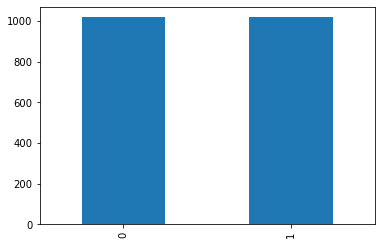

In [40]:
y_os.value_counts().plot(kind = "bar")

In [41]:
df_os = pd.DataFrame(x_os)  #creating dataframe for modeling of data
df_os["outcome"] = y_os

In [42]:
df_os

,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,Mag_cat,ph_cat,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat,anemia_rbc_cat,pt_inr_cat,outcome
0,72,1,0,0,0,0,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0
1,75,2,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
2,83,2,1,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,43,2,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
4,75,2,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,89,2,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2032,68,1,0,1,1,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2033,50,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2034,79,1,1,1,0,0,0,0,0,0,...,1,1,0,0,1,1,0,1,0,1


### relationship between independent variables

In [43]:
independent_variable = df.drop(columns = ['group', 'ID', 'outcome', 'age'],axis = 1)
dependent_variable = df["outcome"]

In [44]:

def cramers_V(var1,var2):                    
    crosstab = np.array(pd.crosstab(var1,var2))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1
    return (stat/(obs * mini))

In [45]:
rows = []
for var1 in independent_variable:
    col = []
    for var2 in independent_variable:
        cramers = cramers_V(independent_variable[var1],independent_variable[var2])
        col.append(round(cramers,2))
    rows.append(col)
cramers_result = np.array(rows)
df2 = pd.DataFrame(cramers_result,columns = independent_variable.columns,index = independent_variable.columns)

In [46]:
df2

,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,...,anion_cat,Mag_cat,ph_cat,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat,anemia_rbc_cat,pt_inr_cat
gendera,1.00,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.01,0.02
BMI_cat,0.01,1.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00
hypertensive,0.00,0.00,1.00,0.00,0.00,0.02,0.00,0.00,0.05,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
atrialfibrillation,0.00,0.00,0.00,1.00,0.00,0.00,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04
CHD with no MI,0.01,0.00,0.00,0.00,0.99,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00
diabetes,0.00,0.01,0.02,0.00,0.00,1.00,0.00,0.00,0.02,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
deficiencyanemias,0.01,0.00,0.00,0.01,0.00,0.00,1.00,0.00,0.00,0.02,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.07,0.00
depression,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Hyperlipemia,0.00,0.00,0.05,0.00,0.00,0.02,0.00,0.00,1.00,0.01,...,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00
Renal failure,0.01,0.00,0.04,0.00,0.00,0.03,0.02,0.00,0.01,1.00,...,0.03,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00


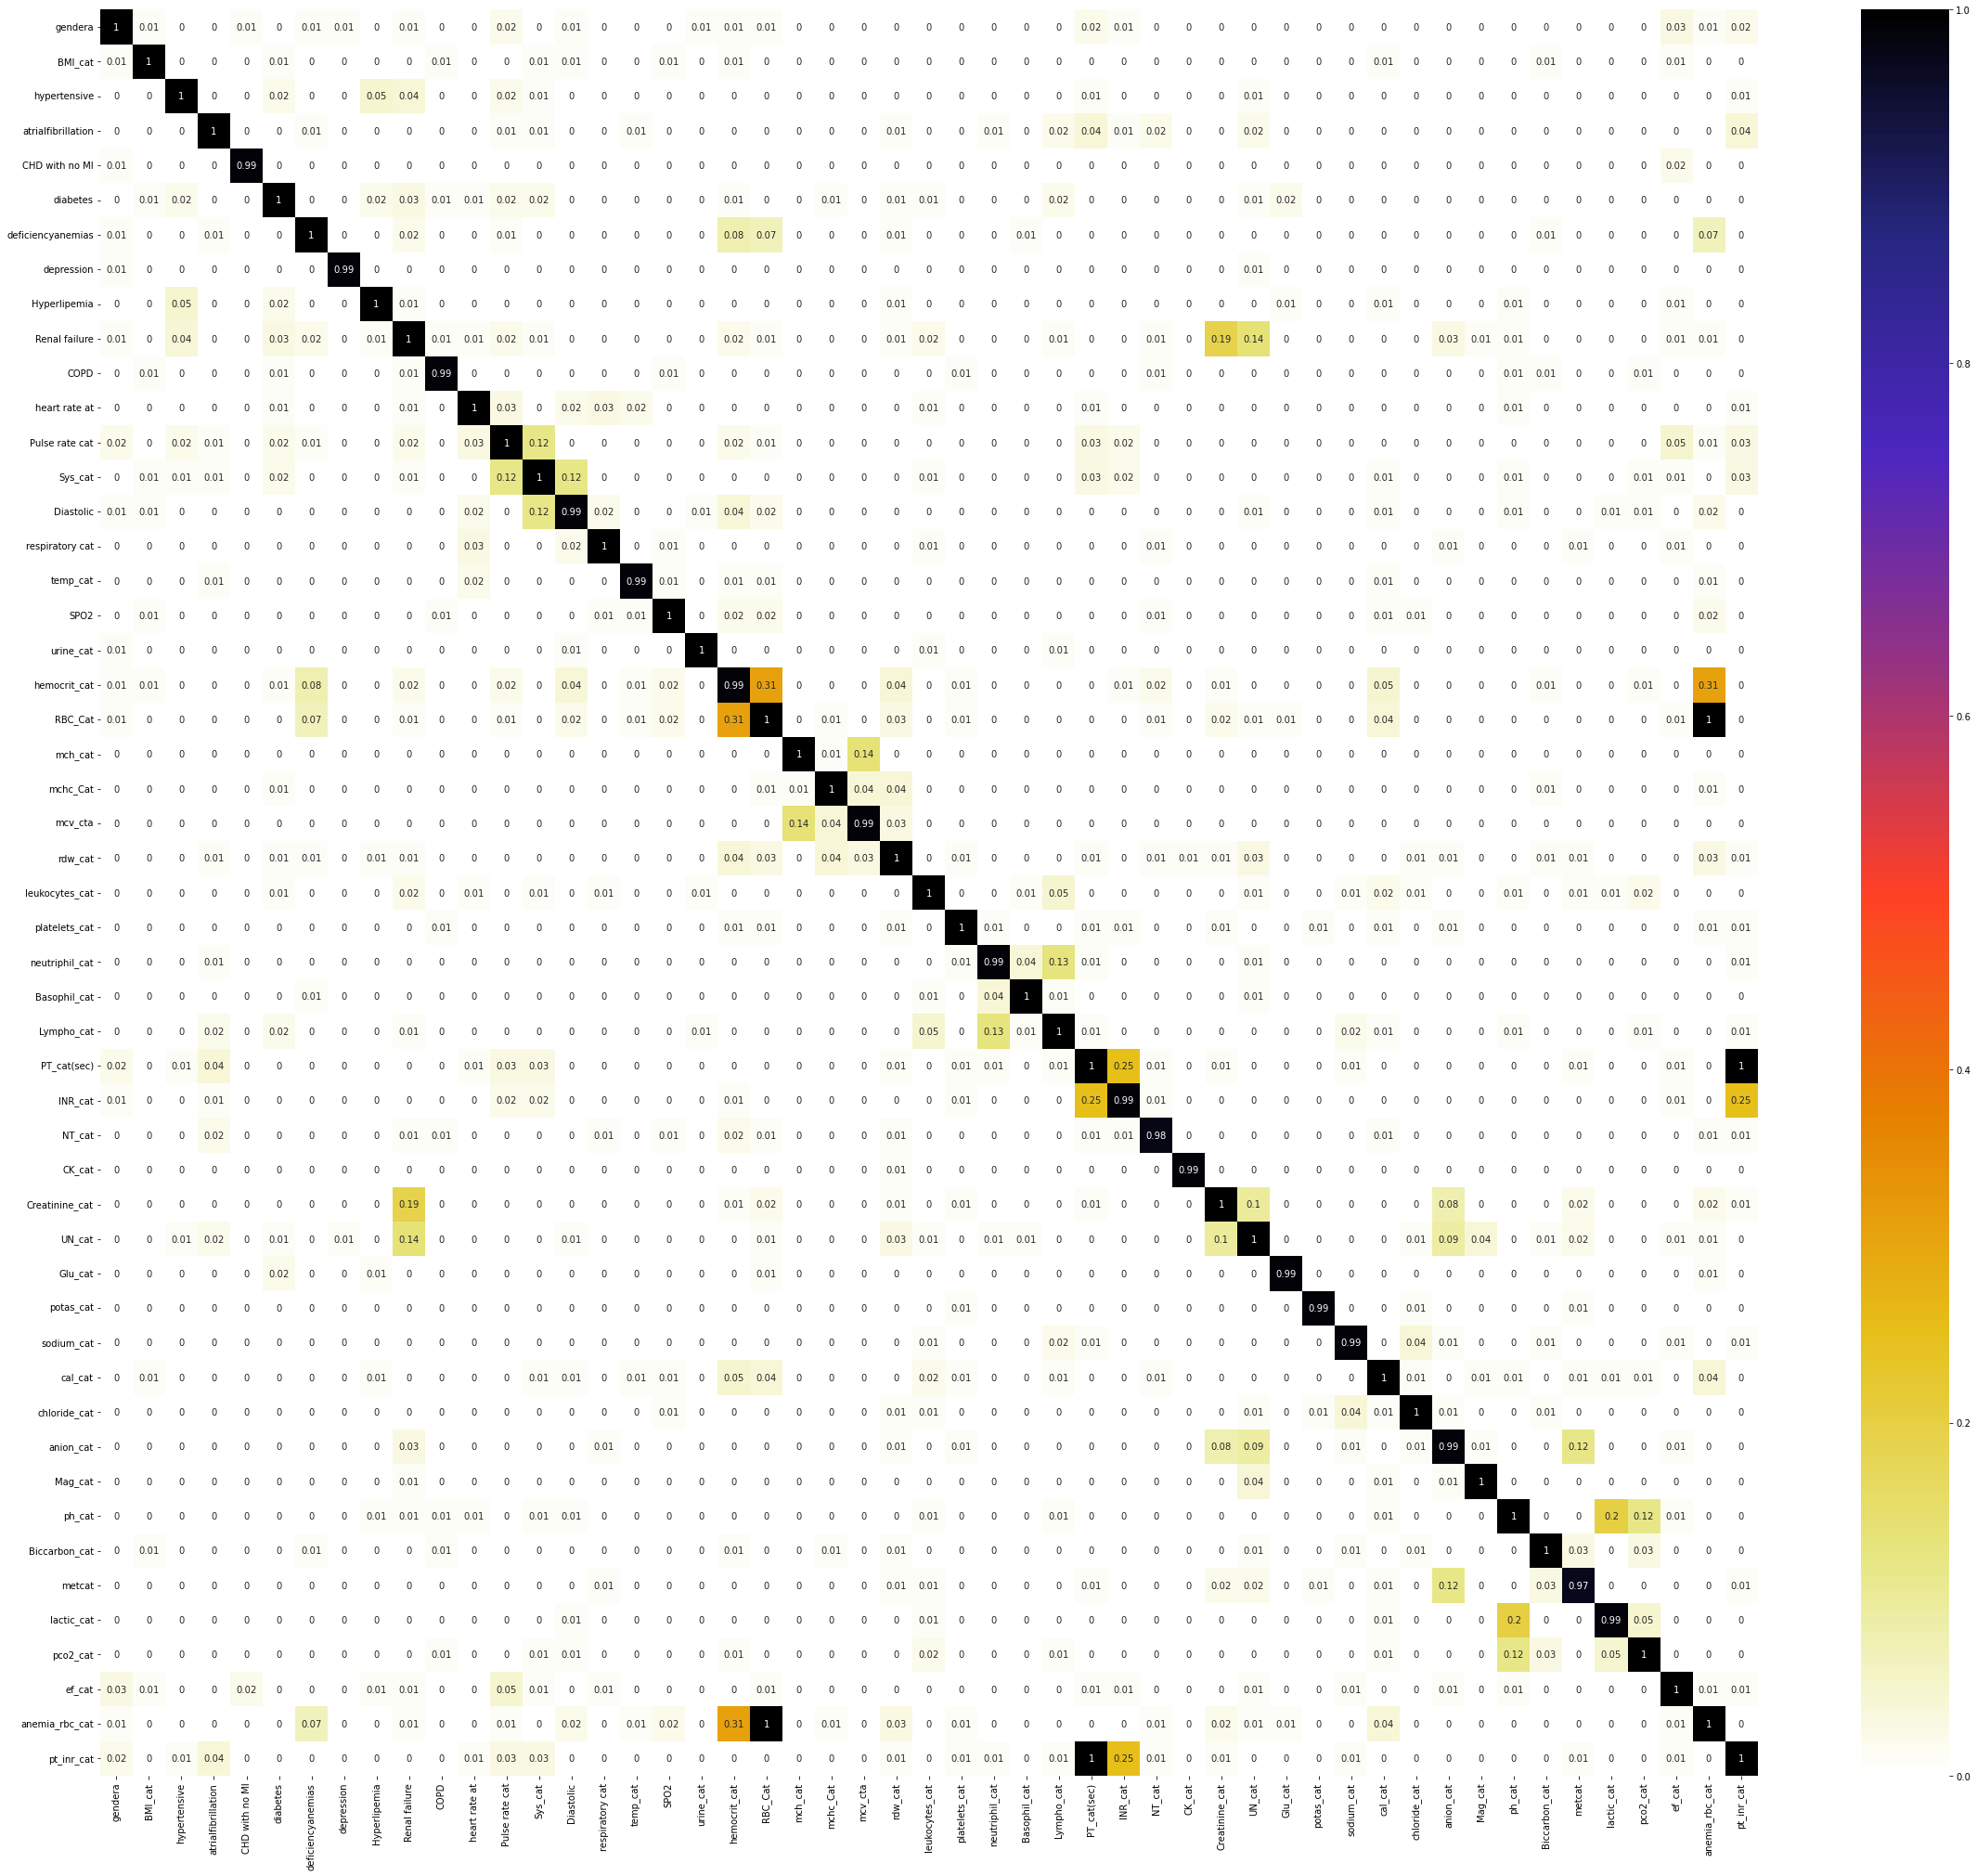

In [47]:
data = np.random.randint(low = 1,high = 100)
plt.figure(figsize = (40,35))
sns.heatmap(data = df2,annot = True,cmap = plt.cm.CMRmap_r)
plt.show()

### feature selection

In [48]:
# from preventing overfitting we will do seperate data into train and test
X_train,X_test,y_train,y_test = train_test_split(df_os.drop(columns = ["outcome"]), y_os,test_size = 0.3,random_state = 0)

In [49]:
X_train.shape

(1425, 52)

In [50]:
y_train.shape

(1425,)

In [51]:
mutual_info = mutual_info_classif(X_train,y_train)  

In [52]:
mutual_info

array([0.01844773, 0.0149914 , 0.02116275, 0.02322116, 0.00613615,
       0.        , 0.01825102, 0.06188226, 0.01413536, 0.03973372,
       0.04353197, 0.01455435, 0.03438362, 0.09493462, 0.04903317,
       0.        , 0.06465405, 0.03142131, 0.02645233, 0.00656123,
       0.        , 0.0262755 , 0.0258411 , 0.04169782, 0.0319625 ,
       0.04905221, 0.10466214, 0.05570339, 0.01285572, 0.        ,
       0.12528891, 0.03004725, 0.00224773, 0.        , 0.02678955,
       0.04072588, 0.05723121, 0.01568988, 0.00544012, 0.03141008,
       0.07980371, 0.03498877, 0.08800759, 0.04632622, 0.01075584,
       0.03814075, 0.        , 0.02677281, 0.00098782, 0.01848519,
       0.02107368, 0.01778161])

In [53]:
mutual_info = pd.Series(mutual_info)   #mutual_info with respect to outcome
mutual_info.index = X_train.columns    # high mutual info means our independent variable contains
                                        #more information about the dependent variable.

mutual_info.sort_values(ascending = False)

Lympho_cat            0.125289
leukocytes_cat        0.104662
Pulse rate cat        0.094935
anion_cat             0.088008
cal_cat               0.079804
respiratory cat       0.064654
deficiencyanemias     0.061882
UN_cat                0.057231
platelets_cat         0.055703
rdw_cat               0.049052
Sys_cat               0.049033
Mag_cat               0.046326
Renal failure         0.043532
mchc_Cat              0.041698
Creatinine_cat        0.040726
Hyperlipemia          0.039734
Biccarbon_cat         0.038141
chloride_cat          0.034989
heart rate at         0.034384
mcv_cta               0.031963
temp_cat              0.031421
sodium_cat            0.031410
PT_cat(sec)           0.030047
CK_cat                0.026790
lactic_cat            0.026773
SPO2                  0.026452
RBC_Cat               0.026275
mch_cat               0.025841
hypertensive          0.023221
BMI_cat               0.021163
anemia_rbc_cat        0.021074
ef_cat                0.018485
age     

<AxesSubplot:>

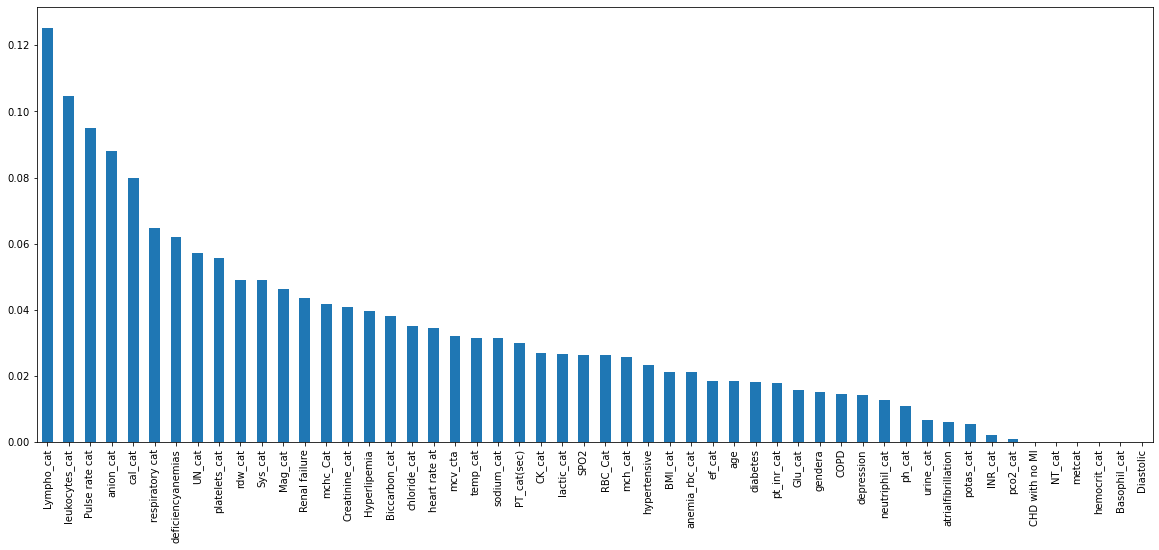

In [54]:
mutual_info.sort_values(ascending = False).plot(kind = "bar",figsize = (20,8))

In [55]:
sel_significant_columns = SelectKBest(mutual_info_classif,k= 15)   #selecting 20 columns according to best info
sel_significant_columns.fit(X_train,y_train)
X_train.columns[sel_significant_columns.get_support()]

Index(['age', 'Renal failure', 'Pulse rate cat', 'Sys_cat', 'respiratory cat',
       'hemocrit_cat', 'RBC_Cat', 'rdw_cat', 'leukocytes_cat', 'Lympho_cat',
       'Creatinine_cat', 'UN_cat', 'anion_cat', 'Mag_cat', 'lactic_cat'],
      dtype='object')

In [56]:
hypothesis_result.set_index("Feature", inplace = True)

<AxesSubplot:xlabel='Feature'>

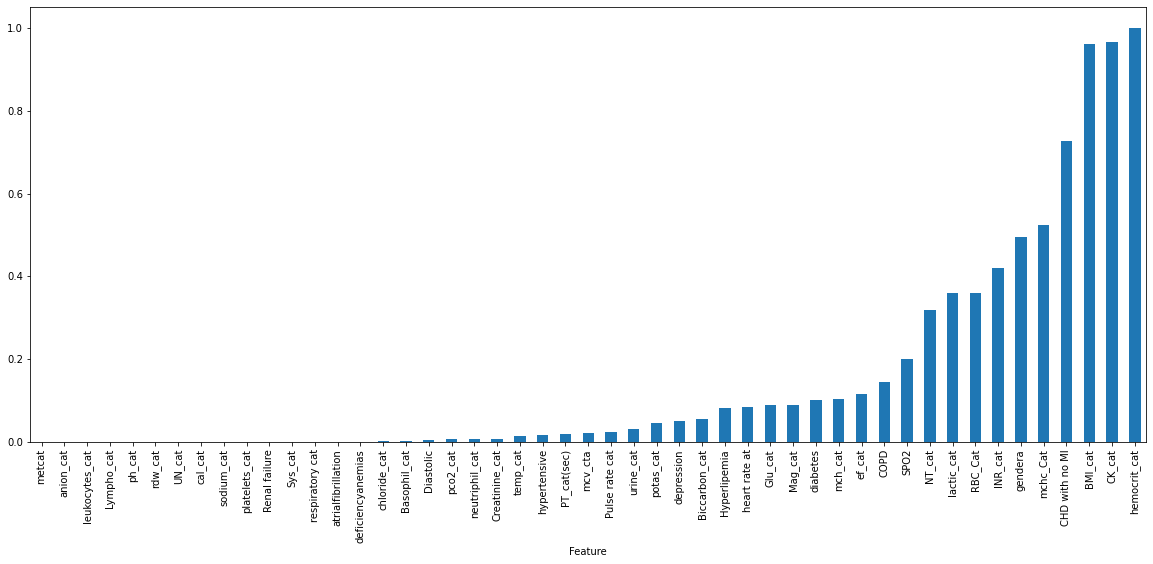

In [57]:
hypothesis_result["p_Value"].sort_values(ascending = True).plot(kind = "bar", figsize = (20,8))

<AxesSubplot:xlabel='Feature'>

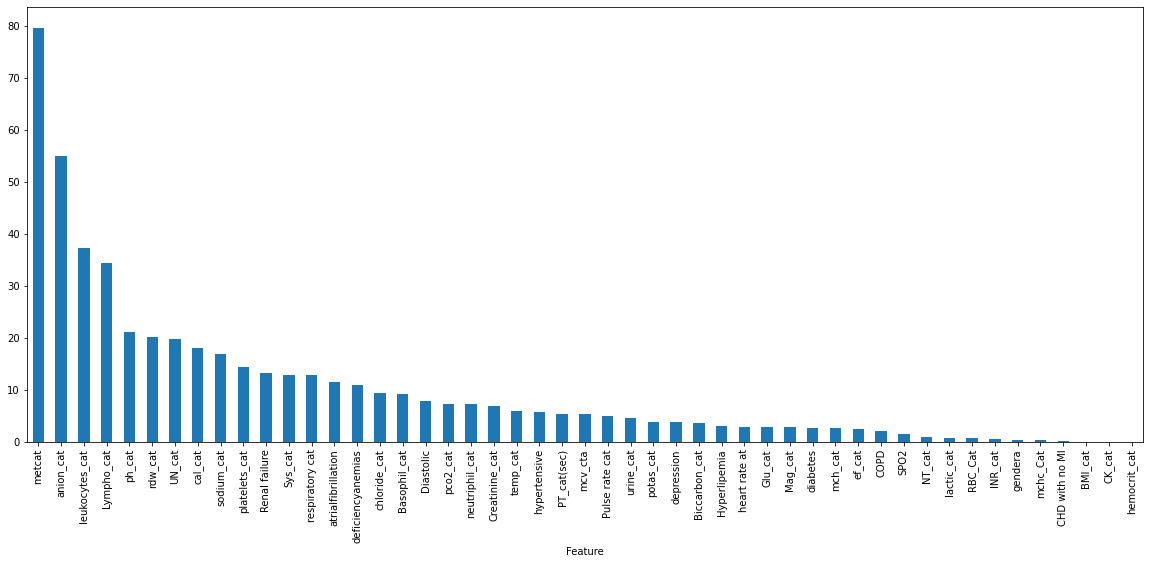

In [58]:
hypothesis_result["chi_square"].sort_values(ascending = False).plot(kind = "bar", figsize = (20,8))

### model building

In [59]:
y = df_os['outcome']
X = df_os.drop(columns = ["outcome"], axis = 1)

### logistic regression

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)

In [61]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [62]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [63]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9050736497545008

In [64]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
auc = np.round(roc_auc_score(y_test, y_pred), 3)
 
print("Auc for our sample data is {}". format(auc))

[[287  27]
 [ 31 266]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       314
           1       0.91      0.90      0.90       297

    accuracy                           0.91       611
   macro avg       0.91      0.90      0.90       611
weighted avg       0.91      0.91      0.91       611

Auc for our sample data is 0.905


Text(0.5, 1.0, 'confusion matrix')

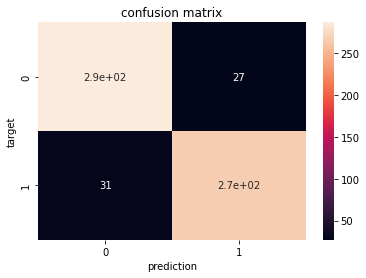

In [65]:
cm = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cm,annot  = True)
plt.xlabel('prediction')
plt.ylabel('target')
plt.title('confusion matrix')

### knn classifier

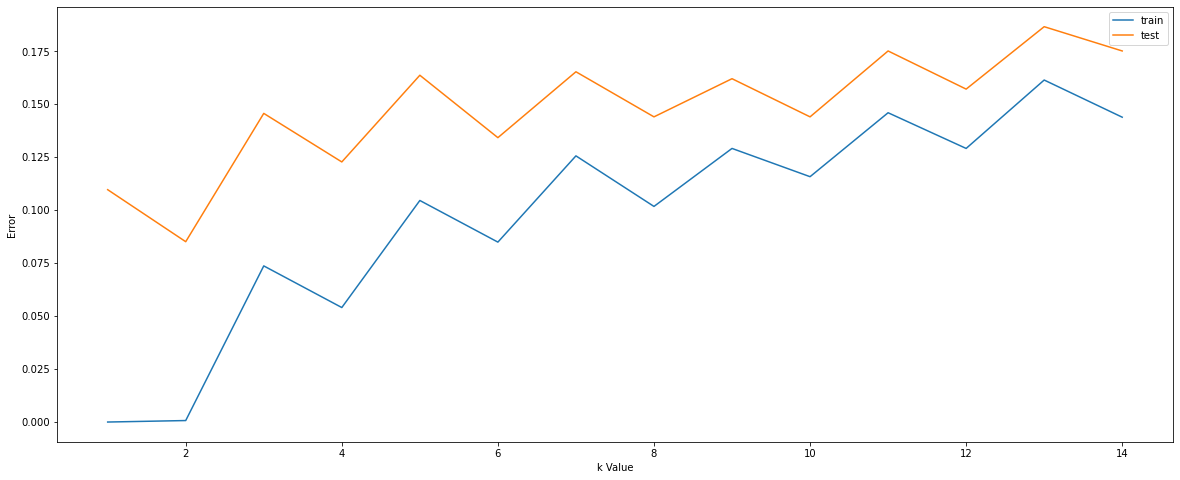

In [66]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
plt.figure(figsize = (20,8))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [67]:
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9148936170212766

In [68]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[264  50]
 [  2 295]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       314
           1       0.86      0.99      0.92       297

    accuracy                           0.91       611
   macro avg       0.92      0.92      0.91       611
weighted avg       0.93      0.91      0.91       611



### decision tree


In [69]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       314
           1       0.81      0.89      0.85       297

    accuracy                           0.84       611
   macro avg       0.85      0.85      0.84       611
weighted avg       0.85      0.84      0.84       611



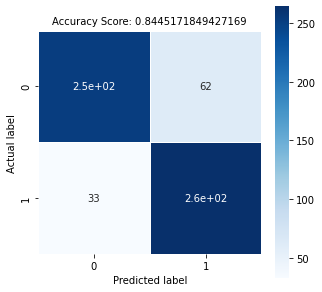

In [71]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 10)

plt.savefig("one.png")

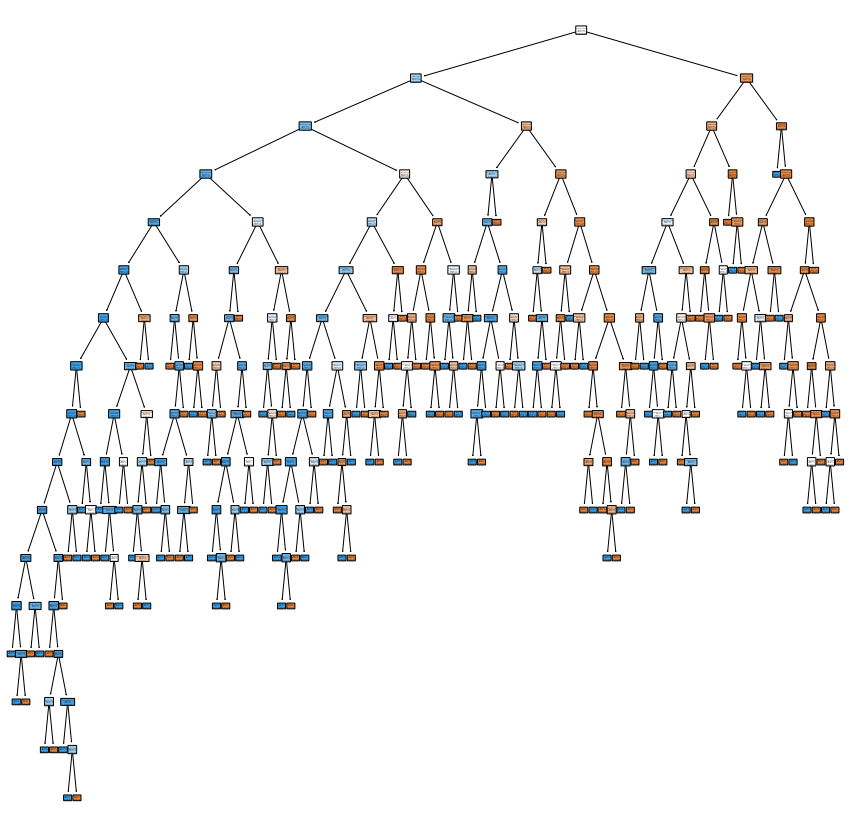

In [72]:
plt.figure(figsize = (15,15))
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns, 
                     class_names =['0','1'] , filled = True , precision = 4, rounded = True)

plt.savefig("one.png")


### svm ( support vector machine)


In [73]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [74]:
y_pred = svclassifier.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9067103109656302

In [75]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[290  24]
 [ 33 264]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       314
           1       0.92      0.89      0.90       297

    accuracy                           0.91       611
   macro avg       0.91      0.91      0.91       611
weighted avg       0.91      0.91      0.91       611



### random forest classifier

In [76]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9328968903436988


## feature selection with the use of ExtraTreeclassifier

## ExtraTreeClassifier

In [77]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 100,
                                        criterion ='gini', max_features = 15)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
#Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

In [78]:
feature_importance

array([0.01619893, 0.01892516, 0.0122154 , 0.01142275, 0.01142402,
       0.00650819, 0.01260257, 0.02668451, 0.00854068, 0.01316683,
       0.05341091, 0.00636664, 0.01180805, 0.01292003, 0.01815045,
       0.00391626, 0.02391389, 0.01017474, 0.01393408, 0.00965866,
       0.00551784, 0.008535  , 0.02668352, 0.00982495, 0.01166411,
       0.06317989, 0.08734425, 0.01950152, 0.00512245, 0.01105414,
       0.1227658 , 0.00734487, 0.00397648, 0.00091211, 0.00657536,
       0.02672973, 0.04006087, 0.0087633 , 0.00761612, 0.01644462,
       0.03421778, 0.0180622 , 0.07214006, 0.01228352, 0.00668201,
       0.01418281, 0.00318507, 0.00803165, 0.00895122, 0.01505361,
       0.00850223, 0.0071482 ])

In [79]:
feature_importance_normalized = pd.Series(feature_importance_normalized)
feature_importance_normalized.index = x.columns

<AxesSubplot:>

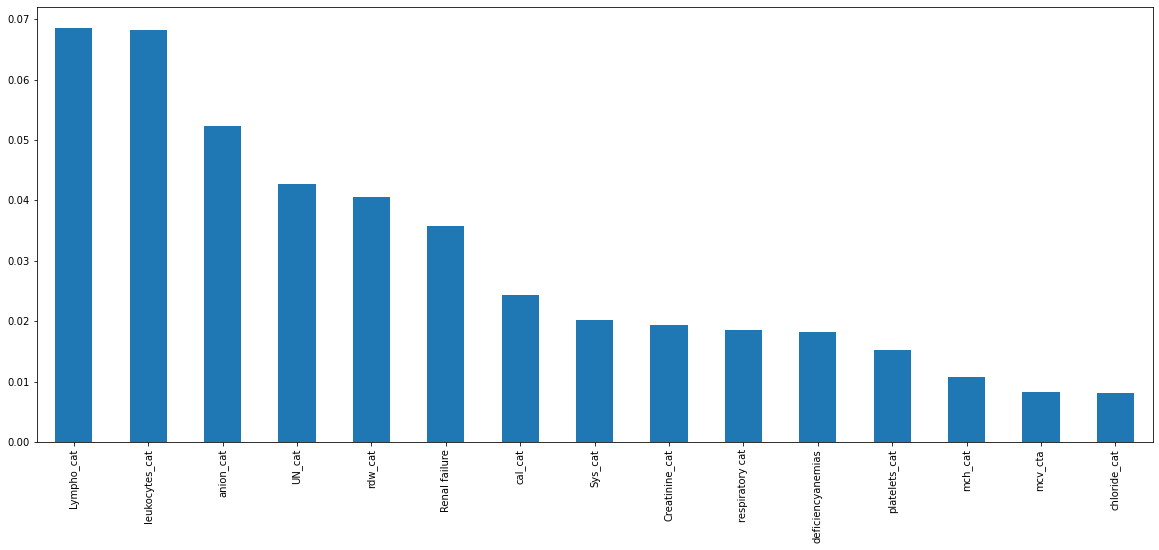

In [80]:
plt.figure(figsize = (20,8))
(pd.Series(feature_importance_normalized, index=X.columns)
   .nlargest(15)
   .plot(kind='bar')) 

## these are the 15 features we can select for our model prediction

In [81]:
(pd.Series(feature_importance_normalized, index=X.columns).nlargest(15))

Lympho_cat           0.068568
leukocytes_cat       0.068253
anion_cat            0.052343
UN_cat               0.042685
rdw_cat              0.040616
Renal failure        0.035700
cal_cat              0.024296
Sys_cat              0.020217
Creatinine_cat       0.019429
respiratory cat      0.018476
deficiencyanemias    0.018291
platelets_cat        0.015227
mch_cat              0.010817
mcv_cta              0.008233
chloride_cat         0.008200
dtype: float64

In [82]:
#leukocytes_cat        0.075004
#Lympho_cat            0.071776
#anion_cat             0.061418
#UN_cat                0.045392
#Creatinine_cat        0.028042
#Renal failure         0.022755
#deficiencyanemias     0.022309
#rdw_cat               0.012340
#RBC_Cat               0.011146
#anemia_rbc_cat        0.009997
#mch_cat               0.009902
#neutriphil_cat        0.008394
#Hyperlipemia          0.008259
#mcv_cta               0.008167
#Sys_cat               0.007774
 

In [83]:
feature_importance_normalized.sort_values(ascending = False)

Lympho_cat            0.068568
leukocytes_cat        0.068253
anion_cat             0.052343
UN_cat                0.042685
rdw_cat               0.040616
Renal failure         0.035700
cal_cat               0.024296
Sys_cat               0.020217
Creatinine_cat        0.019429
respiratory cat       0.018476
deficiencyanemias     0.018291
platelets_cat         0.015227
mch_cat               0.010817
mcv_cta               0.008233
chloride_cat          0.008200
sodium_cat            0.007882
gendera               0.007252
ef_cat                0.006651
temp_cat              0.006444
Hyperlipemia          0.006317
age                   0.006256
SPO2                  0.006242
neutriphil_cat        0.006198
Pulse rate cat        0.006049
depression            0.005951
Biccarbon_cat         0.005933
RBC_Cat               0.005851
hypertensive          0.005835
heart rate at         0.005628
BMI_cat               0.005564
diabetes              0.005377
Mag_cat               0.005295
atrialfi

## Recursive Feature selection using SVM

In [84]:
svc_lin=SVC(kernel='linear')
svm_rfe_model=RFE(estimator=svc_lin,n_features_to_select=15)
svm_rfe_model_fit=svm_rfe_model.fit(X_train,y_train)
feat_index = pd.Series(data = svm_rfe_model_fit.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print('Significant features from RFE',signi_feat_rfe)

Significant features from RFE Index(['Renal failure', 'COPD', 'Sys_cat', 'respiratory cat', 'temp_cat',
       'hemocrit_cat', 'mch_cat', 'rdw_cat', 'leukocytes_cat',
       'neutriphil_cat', 'Lympho_cat', 'CK_cat', 'UN_cat', 'cal_cat',
       'anion_cat'],
      dtype='object')


## Recursive Feature selection using LogisticRegression

In [85]:
clf = LogisticRegression()
clf_rfe_model=RFE(estimator=clf,n_features_to_select=15)
clf_model_fit=clf_rfe_model.fit(X_train,y_train)
feat_index = pd.Series(data = clf_model_fit.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print('Significant features from RFE',signi_feat_rfe)

Significant features from RFE Index(['depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'Sys_cat',
       'temp_cat', 'rdw_cat', 'leukocytes_cat', 'neutriphil_cat', 'Lympho_cat',
       'CK_cat', 'UN_cat', 'cal_cat', 'chloride_cat', 'anion_cat'],
      dtype='object')


### these are the top 15 features by the extra tree classifier
### extra tree classifier              
    1. Lympho_cat           2.leukocytes_cat      3. anion_cat         4. rdw_cat                    
    5. cal_cat              6. UN_cat             7. Renal failure     8. Creatinine_cat       
    9. deficiencyanemias    10.respiratory cat    11. Sys_cat          12. platelets_cat        
    13. chloride_cat        14. mch_cat           15. mcv_cta 
  
### svm
    1. Lympho_cat           2.leukocytes_cat      3. anion_cat         4. rdw_cat                    
    5. cal_cat              6. UN_cat             7. Renal failure     8. mch_cat       
    9. CK_cat              10.respiratory cat    11. Sys_cat          12. COPD        
    13. temp_cat        14.hemocrit_cat           15.neutriphil_cat 
    
    
 ### these are the different variable of  SVM from the extra tree classifier 
 
     1. CK_cat            2. COPD        3. temp_cat          4.hemocrit_cat          5.neutriphil_cat 
     
 ### Random forest regressor
 
    1. Lympho_cat          2.leukocytes_cat      3. anion_cat         4. rdw_cat                    
    5. cal_cat             6. UN_cat             7. Renal failure     8. mch_cat       
    9. chloride_cat        10.respiratory cat    11. deficiencyanemias          12. age        
    13. gendera            14.Pulse rate cat      15.Creatinine_cat 


## Recursive Feature selection using LogisticRegression

In [86]:
clf = RandomForestClassifier(n_estimators = 100)
clf_rfe_model=RFE(estimator=clf,n_features_to_select=15)
clf_model_fit=clf_rfe_model.fit(X_train,y_train)
feat_index = pd.Series(data = clf_model_fit.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print('Significant features from RFE',signi_feat_rfe)
       
       
       

Significant features from RFE Index(['age', 'gendera', 'deficiencyanemias', 'Renal failure',
       'Pulse rate cat', 'respiratory cat', 'mch_cat', 'rdw_cat',
       'leukocytes_cat', 'Lympho_cat', 'Creatinine_cat', 'UN_cat', 'cal_cat',
       'chloride_cat', 'anion_cat'],
      dtype='object')
